In [3]:
%reload_ext blackcellmagic

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action = 'ignore')

In [116]:
df=pd.read_csv('data.csv')

In [117]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [118]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
missing_columns = df.columns[df.isnull().any()]
missing_counts = df[missing_columns].isnull().sum()

missing_data = pd.DataFrame({'Column': missing_columns, 'Missing Count': missing_counts})
missing_data


,Column,Missing Count
LotFrontage,LotFrontage,259
Alley,Alley,1369
MasVnrType,MasVnrType,8
MasVnrArea,MasVnrArea,8
BsmtQual,BsmtQual,37
BsmtCond,BsmtCond,37
BsmtExposure,BsmtExposure,38
BsmtFinType1,BsmtFinType1,37
BsmtFinType2,BsmtFinType2,38
Electrical,Electrical,1


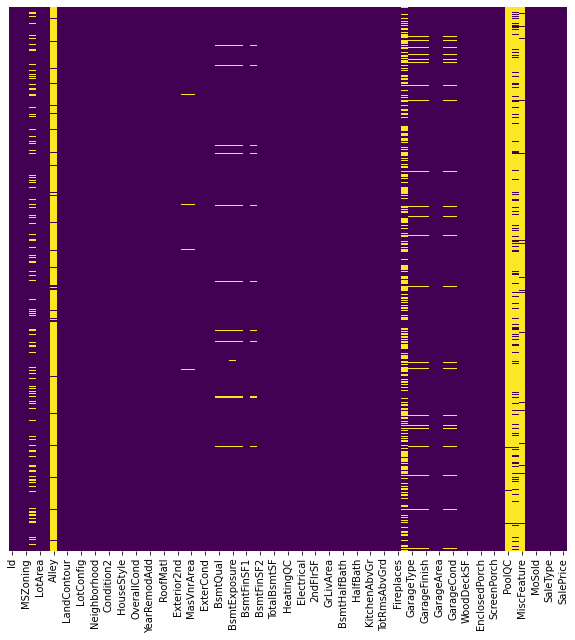

In [7]:
plt.figure(figsize=(10, 10))  # Set the figure size to 10 inches by 8 inches
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [8]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 3)*100,  ' % missing values')

LotFrontage 17.7  % missing values
Alley 93.8  % missing values
MasVnrType 0.5  % missing values
MasVnrArea 0.5  % missing values
BsmtQual 2.5  % missing values
BsmtCond 2.5  % missing values
BsmtExposure 2.6  % missing values
BsmtFinType1 2.5  % missing values
BsmtFinType2 2.6  % missing values
FireplaceQu 47.3  % missing values
GarageType 5.5  % missing values
GarageYrBlt 5.5  % missing values
GarageFinish 5.5  % missing values
GarageQual 5.5  % missing values
GarageCond 5.5  % missing values
PoolQC 99.5  % missing values
Fence 80.80000000000001  % missing values
MiscFeature 96.3  % missing values


In [9]:
df.drop(['Alley'],axis=1,inplace=True)

In [10]:
df.drop(['Fence'],axis=1,inplace=True)

In [11]:
df.drop(['MiscFeature'],axis=1,inplace=True)

In [12]:
df.drop(['FireplaceQu'],axis=1,inplace=True)

In [13]:
df.shape

(1460, 77)

In [14]:
#checking for the rest of the missing values

#step1
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

#step2
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 3)*100,  ' % missing values')

LotFrontage 17.7  % missing values
MasVnrType 0.5  % missing values
MasVnrArea 0.5  % missing values
BsmtQual 2.5  % missing values
BsmtCond 2.5  % missing values
BsmtExposure 2.6  % missing values
BsmtFinType1 2.5  % missing values
BsmtFinType2 2.6  % missing values
GarageType 5.5  % missing values
GarageYrBlt 5.5  % missing values
GarageFinish 5.5  % missing values
GarageQual 5.5  % missing values
GarageCond 5.5  % missing values
PoolQC 99.5  % missing values


In [15]:
df.drop(['PoolQC'],axis=1,inplace=True)

In [16]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [17]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode().iloc[0])

In [18]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [19]:
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode().iloc[0])

In [20]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode().iloc[0])

In [21]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode().iloc[0])

In [22]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode().iloc[0])

In [23]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode().iloc[0])

In [24]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode().iloc[0])

In [25]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode().iloc[0])

In [26]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode().iloc[0])

In [27]:
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode().iloc[0])

In [28]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode().iloc[0])

In [29]:

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 3)*100,  ' % missing values')

In [30]:
df.dtypes[df.dtypes == 'int64']

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [31]:
print("Total no of unique valuesin MSSubCLass is",len(df['MSSubClass'].value_counts()))
df['MSSubClass'].value_counts()

Total no of unique valuesin MSSubCLass is 15


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

Since MSSubClass has only 15 unique values it can be considered as a category even though its data type is int64

In [32]:
df['MSSubClass'] = df['MSSubClass'].astype('category')

In [33]:
df['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

-Since the OverQuall is nothing but a rating in the scale of 1 to 10, we can bin them into 3 major values and convert them into category

-We can also obtain some new features such as:

Age of the house using the YearBuilt feature and

Years since the last remodel using the YearRemodAdd feature

-These feature can be more insightful

In [34]:
# Define the mapping of ratings to categorical labels
rating_mapping = {1: 'Low',2: 'Low',3: 'Low',4: 'Medium',5: 'Medium',6: 'Medium',7: 'Medium',8: 'High',9: 'High',10: 'High'}


# Convert 'OverallQual' to ordinal categorical variable
df['OverallQual'] = df['OverallQual'].map(rating_mapping).astype('category')


In [35]:
# Create a new feature: Age of the house
current_year = datetime.datetime.now().year
df['AgeOfHouse'] = current_year - df['YearBuilt']

# Create a new feature: Years since last remodel
df['YearsSinceRemodel'] = current_year - df['YearRemodAdd']

Now that we have AGeOfHouse and YearsSinceRemodel features we don't need YearBuilt and YearRemodAdd features anymore as they provide the same kind of information and would be highly correlated 

In [36]:
df.drop(['YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

## Now we need to identify the features that need to be treated as categorical features

In [37]:
df.dtypes[df.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

These variables needs to be treated as category rather than object

In [38]:
# Create an empty list to store object variables
object_vars = []

# Iterate through columns and check data type
for col in df.columns:
    if df[col].dtype == 'object':
        object_vars.append(col)
        
# Convert object variables to category
df[object_vars] = df[object_vars].astype('category')

In [39]:
df.dtypes[df.dtypes == 'category']

MSSubClass       category
MSZoning         category
Street           category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual      category
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinType2     category
Heating          category
HeatingQC        category
CentralAir       category
Electrical       category
KitchenQual      category
Functional       category
GarageType       category
GarageFinish     category
GarageQual       category
GarageCond       category
PavedDrive       category
SaleType    

In [40]:
# Numerical datatypes
numerical_features=df.select_dtypes(include=['int64','float64','Int64']).dtypes

## Univariate Analysis (Numerical Features)

In [41]:
numerical_features

Id                     int64
LotFrontage          float64
LotArea                int64
OverallCond            int64
MasVnrArea           float64
BsmtFinSF1             int64
BsmtFinSF2             int64
BsmtUnfSF              int64
TotalBsmtSF            int64
1stFlrSF               int64
2ndFlrSF               int64
LowQualFinSF           int64
GrLivArea              int64
BsmtFullBath           int64
BsmtHalfBath           int64
FullBath               int64
HalfBath               int64
BedroomAbvGr           int64
KitchenAbvGr           int64
TotRmsAbvGrd           int64
Fireplaces             int64
GarageYrBlt          float64
GarageCars             int64
GarageArea             int64
WoodDeckSF             int64
OpenPorchSF            int64
EnclosedPorch          int64
3SsnPorch              int64
ScreenPorch            int64
PoolArea               int64
MiscVal                int64
MoSold                 int64
YrSold                 int64
SalePrice              int64
AgeOfHouse    

Forming different groups of the variables can helpful as we can perform Univariate analysis on the basis of groups

In [42]:
#grouping of variables

lot_var=['LotFrontage','LotArea']
mansion_var=['MasVnrArea']
bsmt_var=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
bathroom_var=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']
floor_var=['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea']
building_var=['OverallCond','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces']
garage_var=['GarageYrBlt','GarageArea']
outdoor_var=['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GarageCars','PoolArea']
time_var=['MoSold','AgeOfHouse','YearsSinceRemodel','YrSold']
misc_var=['MiscVal']
target_var=['SalePrice']

In [43]:
def UVA_continuous(data, features, ylims=None):
    """
    Plots histogram with statistics for groups of continuous variables.

    Args:
    - data: DataFrame containing the data
    - features: List of continuous features
    - ylims: Dictionary of feature-specific y-axis limits (key: feature name, value: (ymin, ymax))

    Returns:
    - Histogram visualization of each feature with statistics.
    """
    num_features = len(features)
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = (num_features + num_cols - 1) // num_cols  # Number of rows in the subplot grid

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    for i, feature in enumerate(features):
        if num_rows > 1:
            ax = axs[i // num_cols, i % num_cols]
        else:
            ax = axs[i]

        sns.kdeplot(data[feature], shade=True, ax=ax)
        ax.set_xlabel(feature)
        ax.set_ylabel("Density")
        ax.set_title(f"KDE plot: {feature}")

        # Set feature-specific y-axis limits if specified
        if ylims is not None and feature in ylims:
            ax.set_ylim(ylims[feature])

        mean = data[feature].mean()
        median = data[feature].median()
        minimum = data[feature].min()
        maximum = data[feature].max()
        skewness = data[feature].skew()

        ax.plot(mean, 0, marker='o', markersize=5, color='red', label=f"Mean: {mean:.2f}")
        ax.plot(median, 0, marker='o', markersize=5, color='green', label=f"Median: {median:.2f}")
        ax.plot(minimum, 0, marker='o', markersize=5, color='purple', label=f"Min: {minimum:.2f}")
        ax.plot(maximum, 0, marker='o', markersize=5, color='orange', label=f"Max: {maximum:.2f}")
        ax.plot(0, 0, markersize=5, color='blue', label=f"Skewness: {skewness:.2f}")

        ax.legend()

    # Remove any unused subplots
    if num_features < num_rows * num_cols:
        for i in range(num_features, num_rows * num_cols):
            if num_rows > 1:
                ax = axs[i // num_cols, i % num_cols]
            else:
                ax = axs[i]
            ax.axis("off")

    plt.show()

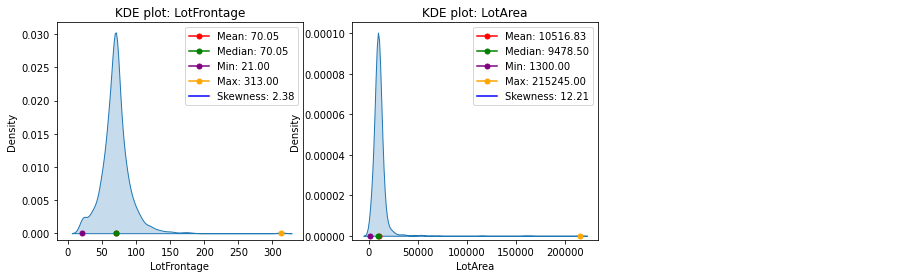

In [44]:
#dictionary to set the offset for y axis
lot_var_dict={'LotFrontage':(-0.001,None),'LotArea':(-0.000002,None)}

UVA_continuous(df,lot_var,lot_var_dict)

Both the lot related variables are positively skewed or right skewed 

**LotFrontage**

-The minimum value is 0, indicating that there are some instances where the lot frontage is not available or not recorded.

-The maximum value is 313, indicating the presence of a property with a large lot frontage.

**LotArea**

-The minimum value is 13000, and the maximum value is 215245, indicating a wide range of lot areas in the dataset.

-The skewness value of 12.21 indicates a high degree of skewness, with a long tail on the right side of the distribution.


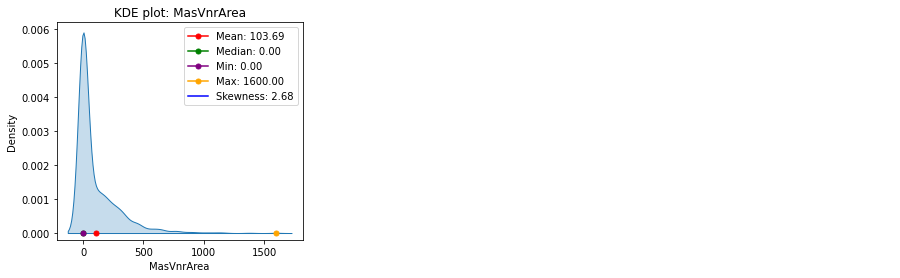

In [45]:
#dictionary to set the offset for y axis
mansion_var_dict={'MasVnrArea':(-0.0002,None)}

UVA_continuous(df,mansion_var,mansion_var_dict)

-We can say that the distribution of Masonry veneer type area is highly right-skewed, with a majority of properties having little to no masonry veneer area (as indicated by the median of 0). 

-However, there are a few properties with relatively large masonry veneer areas that contribute to the right-skewness of the distribution. 

-The presence of outliers or extreme values on the right side of the distribution is suggested by the high skewness value.

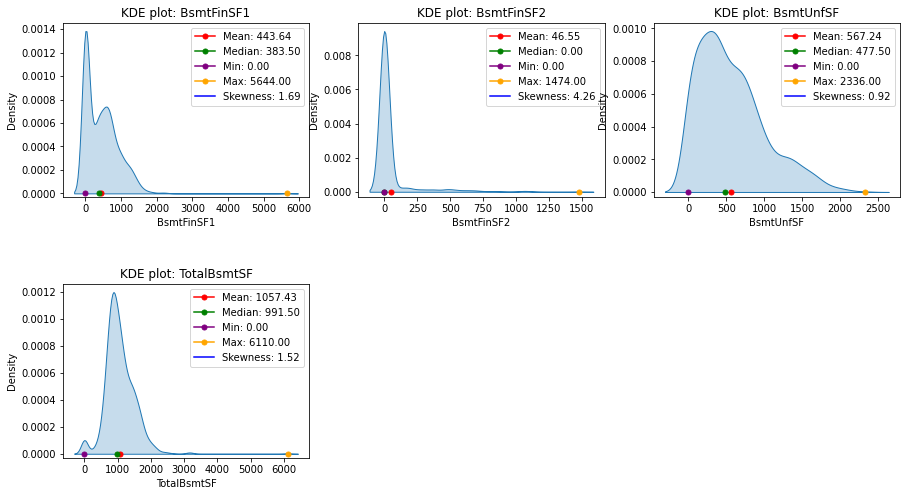

In [46]:
#dictionary to set the offset for y axis
bsmt_var_dict={'BsmtFinSF1':(-0.00003,None),'BsmtFinSF2':(-0.0003,None),'BsmtUnfSF':(-0.00003,None),'TotalBsmtSF':(-0.00003,None)}

UVA_continuous(df,bsmt_var,bsmt_var_dict)

In [47]:
bsmt_var=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']

new_df = df[bsmt_var]
new_df['Calculated_TotSF']=new_df['BsmtFinSF1']+new_df['BsmtFinSF2']+new_df['BsmtUnfSF']
new_df.head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Calculated_TotSF
0,706,0,150,856,856
1,978,0,284,1262,1262
2,486,0,434,920,920
3,216,0,540,756,756
4,655,0,490,1145,1145


**BsmtFinSF1**

-In the dataset on average, the basement finished square footage is around 443.64 square feet.

-The median value of BsmtFinSF1 is 383.50, which is slightly lower than the mean. This suggests that the distribution of the data may be slightly skewed towards higher values.

-The minimum value is 0, indicating that there are some observations with no basement finished square footage.

**BsmtFinSF2**

-The mean value of BsmtFinSF2 is 46.55 and the  median value of BsmtFinSF2 is 0, which means that the majority of observations have no basement finished square footage of type 2.

-The skewness value of 4.26 indicates a highly skewed distribution towards higher values. This suggests that there may be a small number of observations with significantly higher basement finished square footage of type 2

**BsmtUnfSF**

-On average, the unfinished basement square footage is around 567.24 square feet.

-The minimum value is 0, indicating that there are houses with no unfinished basement square footage.

-The maximum value is 2336, suggesting that there are houses with relatively large amounts of unfinished basement square footage.

**TotalBsmtSF**

-The average Total Basement area of the houses is 1057.43 square feet

-Also it has been observed that the TotalBsmtSF is equal to the sum of of the other three bsmt_var and that maybe the reason that its distriution is positively skewed similiar to other bsmt_var, so if needed we can use only selected featuures out of these groups

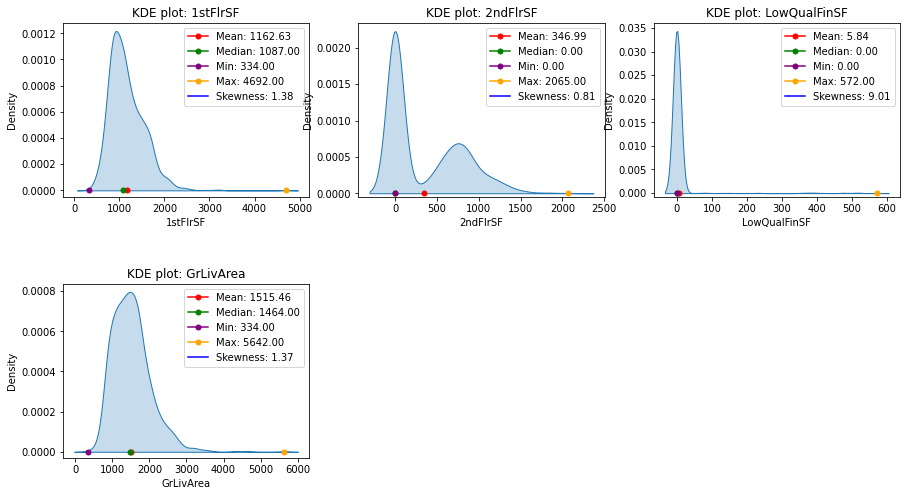

In [48]:
#dictionary to set the offset for y axis
floor_var_dict={'1stFlrSF':(-0.00005,None),'2ndFlrSF':(-0.00005,None),'LowQualFinSF':(-0.0008,None),'GrLivArea':(-0.00003,None)}

UVA_continuous(df,floor_var,floor_var_dict)

In [49]:
new_df = df[floor_var]
new_df['cal_GrLivArea']=new_df['1stFlrSF']+new_df['2ndFlrSF']+new_df['LowQualFinSF']
new_df.head(10)

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,cal_GrLivArea
0,856,854,0,1710,1710
1,1262,0,0,1262,1262
2,920,866,0,1786,1786
3,961,756,0,1717,1717
4,1145,1053,0,2198,2198
5,796,566,0,1362,1362
6,1694,0,0,1694,1694
7,1107,983,0,2090,2090
8,1022,752,0,1774,1774
9,1077,0,0,1077,1077


**1stFlrSF**

-The average first-floor square footage is approximately 1162.63 square feet.

-The minimum first-floor square footage is 334 square feet, while the maximum is 4692 square feet. This indicates a wide range of variation in the size of the first floor among the houses in the dataset.

-The skewness value of 1.38 indicates that the distribution of first-floor square footage is moderately right-skewed, which can interpreted by the value of median, as it is less than the mean value

**2ndFlrSF**

-The average second-floor square footage is approximately 346.99 square feet.

-The median second-floor square footage is 0 square feet. This indicates that a significant number of houses in the dataset do not have a second floor.

-The skewness value of 0.081 indicates that the distribution of second-floor square footage is nearly symmetrical.

-But the presence of two peaks in the KDE plot suggests the presence of two distinct groups or subpopulations within the data. It is possible that one group represents houses without a second floor (0 square feet) and the other group represents houses with varying second-floor areas.

**LowQualFinSF**

-The average low-quality finished square footage is approximately 5.84 square feet.

-The median low-quality finished square footage is 0 square feet, so is the minimum value. This indicates that a significant number of houses in the dataset do not have low-quality finished areas.

-The skewness value of 9.01 indicates a highly skewed distribution. The presence of a large skewness value indicates that the distribution of low-quality finished square footage is highly right-skewed, with a few houses having relatively larger low-quality finished areas compared to the majority of houses with no or very small low-quality finished areas.

**GrLivArea**

-The median above-ground living area is 1464 square feet. This represents the middle value of the distribution, indicating that roughly half of the houses have a living area larger than 1464 square feet and the other half have a smaller living area.

-The skewness value of 1.37 indicates a moderately skewed distribution. The positive skewness suggests that there are a few houses with relatively larger living areas

-This indicates the presence of larger houses with more spacious living areas in the dataset.

-More over it also indicates the sum of all the other floor related variables

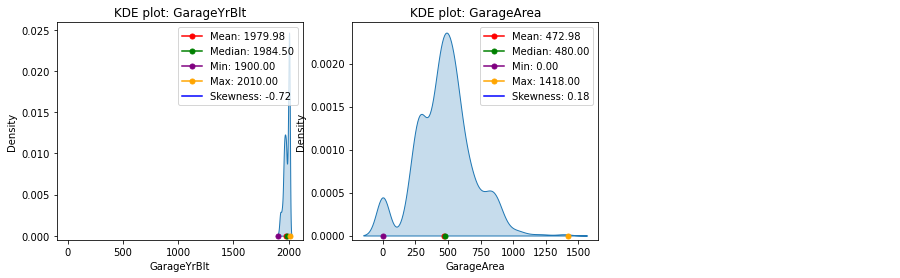

In [50]:
#dictionary to set the offset for y axis
garage_var_dict={'GarageYrBlt':(-0.0005,None),'GarageArea':(-0.00005,None)}

UVA_continuous(df,garage_var,garage_var_dict)

Since we cant't visualise much from the plot of GarageYrlt, we can focus only on the mentioned values for better visualisation

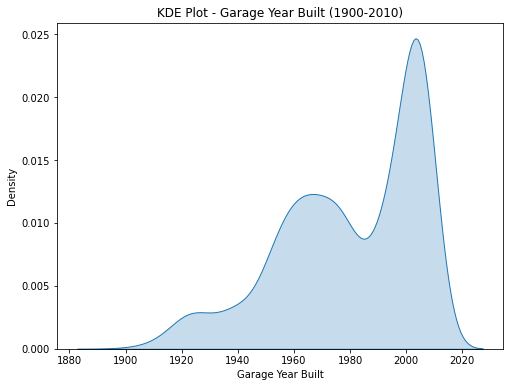

In [51]:
# Filter the data for the desired range of years
filtered_data = df[(df['GarageYrBlt'] >= 1900) & (df['GarageYrBlt'] <= 2010)]

# Plot the KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(filtered_data['GarageYrBlt'],shade=True)
plt.xlabel('Garage Year Built')
plt.ylabel('Density')
plt.title('KDE Plot - Garage Year Built (1900-2010)')

plt.show()

**GarageYrBlt**

-The mean (1978.51) and median (1980) indicate that the majority of the garages were built around the late 1970s or early 1980s.

-The negative skewness (-0.65) suggests a slight left skew, indicating that the distribution is slightly shifted towards the earlier years.

-The bimodal nature of the KDE plot, with peaks around 1960-1980 and 2000, suggests that there are two notable periods of garage construction. This could indicate a possible renovation or addition of garages in these periods.

**GarageArea**

-The mean (472.98) and median (482) indicate that the average and central values of garage area are close, suggesting a relatively symmetrical distribution.

-Further the skewness (0.18) close to zero suggests a nearly symmetric distribution with a slight right tail.

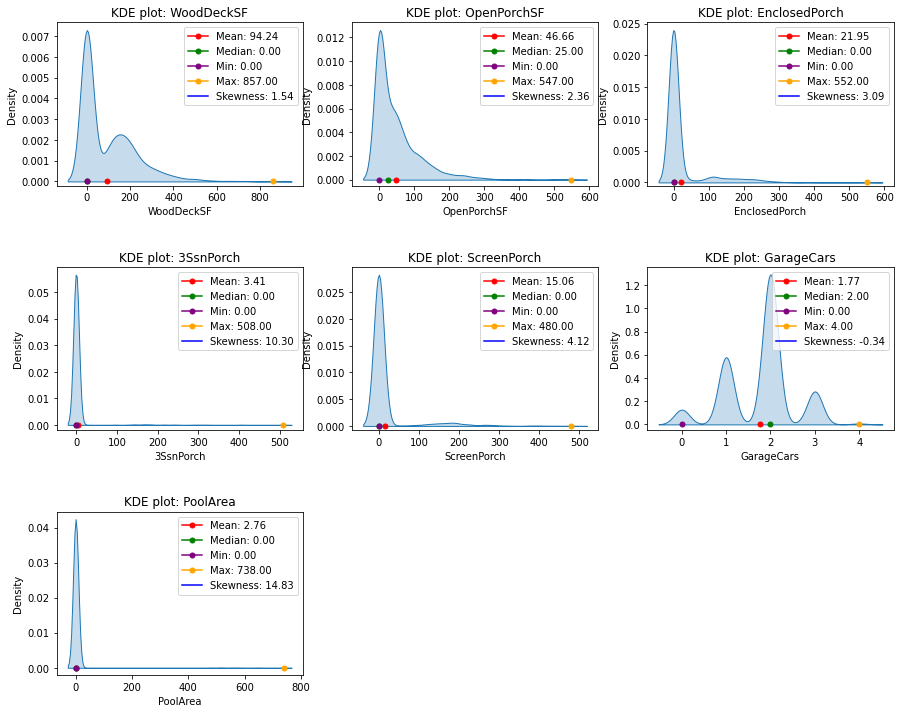

In [52]:
#dictionary to set the offset for y axis
outdoor_var_dict={'WoodDeckSF':(-0.0002,None),'OpenPorchSF':(-0.0005,None),'EnclosedPorch':(-0.0005,None),
                  '3SsnPorch':(-0.002,None),'ScreenPorch':(-0.0008,None),'GarageCars':(-0.05,None),'PoolArea':(-0.002,None)}

UVA_continuous(df,outdoor_var,outdoor_var_dict)

In [53]:
df['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

**WoodDeckSF**

-The majority of the houses have either no wood deck or a relatively small wood deck area.

-The presence of houses without a wood deck suggests that some properties might not have this feature.

-The small peak near zero suggests a large number of houses with no or minimal wood deck area.

-The small peak near 150 suggests another group of houses with a moderate wood deck area.

-The large skewness indicates that there are few houses with larger wood deck areas, which are driving the right tail of the distribution.

**OpenPorchSF**

-The majority of the houses have either no open porch or a relatively small open porch area.

-The presence of houses without an open porch suggests that some properties might not have this feature.

-The  skewness of 2.36 indicates that there are few houses with larger open porch areas, which are driving the right tail of the distribution.

**EnclosedPorch**

-The small median value (0) indicates that most houses with enclosed porches have relatively small areas, with many houses having no enclosed porch.

-The presence of houses without an enclosed porch suggests that some properties might not have this feature.

-The large skewness indicates that there are few houses with larger enclosed porch areas

**3SsnPorch**

-The majority of the houses either do not have a 3-season porch or have a very small area.

-The presence of houses without a 3-season porch suggests that some properties might not have this feature.

-The extremely high skewness (10.30) indicates that there are very few houses with larger 3-season porch areas

**ScreenPorch**

-The small median value (0) indicates that most houses with screen porches have relatively small areas, with many houses having no screen porch.

-The large maximum value (480) suggests the presence of a few houses with very large screen porch areas.

-The extremely high skewness (4.12) indicates that there are very few houses with larger screen porch areas

**GarageCars**

-The majority of houses in the dataset have two fireplaces followed by one and three fireplaces in the house. This suggests that having two fireplaces is the most common scenario among the houses in the dataset.

**PoolArea**

-Majority of the dataset contains the PoolArea as 0 implying that the houses don't have any pool

-The entire dataset only contains 7 houses with a pool and the area varies forr all the avialble pools. The specific pool area values (512, 648, 576, 555, 480, 519, 738) represent the size or area of the pools in the respective houses. However, since each value has a count of 1, it is difficult to draw meaningful conclusions about the size distribution of the pools based on this dataset.

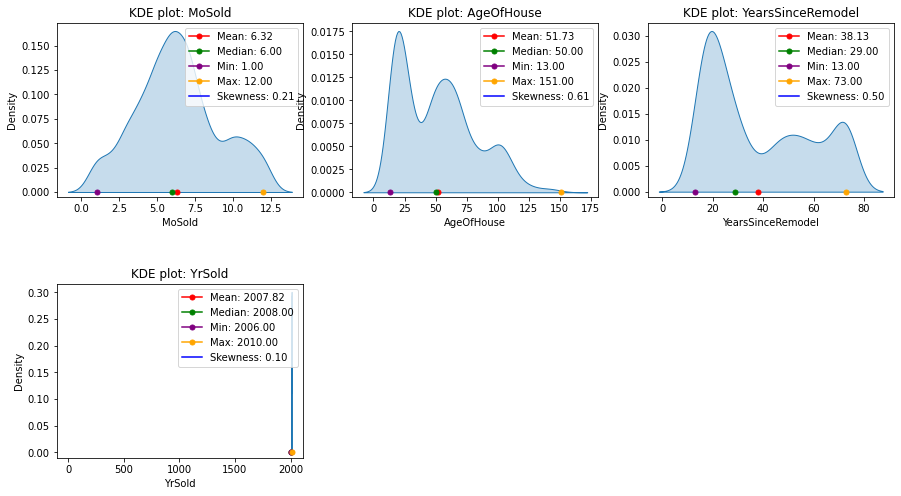

In [54]:
#dictionary to set the offset for y axis
time_var_dict={'MoSold':(-0.005,None),'AgeOfHouse':(-0.0005,None),'YearsSinceRemodel':(-0.001,None),'YrSold':(-0.01,None)}

UVA_continuous(df,time_var,time_var_dict)

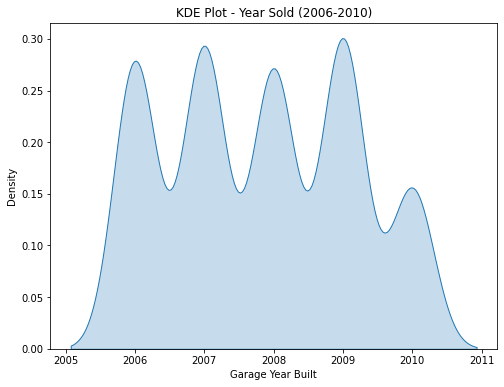

In [55]:
##For better visualiszation of the YrSOld features

# Filter the data for the desired range of years
filtered_data = df[(df['YrSold'] >= 2006) & (df['YrSold'] <= 2010)]

# Plot the KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(filtered_data['YrSold'],shade=True)
plt.xlabel('Garage Year Built')
plt.ylabel('Density')
plt.title('KDE Plot - Year Sold (2006-2010)')

plt.show()

In [56]:
df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

**MoSold**

-The mean and median values being close together indicate a balanced distribution with no pronounced outliers or extreme values.

-The range of values spans the entire year, suggesting a diverse representation of sale months in the dataset.

-There is no indication of any particular pattern or trend in the distribution of sales across months.

**AgeOfHouse**

-The distribution of the variable "AgeOfHouse" is relatively balanced, with no extreme skewness or outliers.

-The presence of multiple peaks in the KDE plot suggests the presence of distinct groups or subpopulations within the dataset.

-The tallest peak near 13 years indicates a concentration of relatively new houses, potentially reflecting a period of active construction or development.

-The peak near 50 years suggests a significant number of houses that are around the halfway point in terms of age.

-The small peak near 100 years may represent a smaller subset of houses that are significantly older.

**YearsSinceRemodel**

-The distribution of the variable "YearsSinceRemodel" is relatively balanced, with no extreme skewness or outliers.

-The presence of multiple peaks in the KDE plot suggests the presence of distinct groups or subpopulations within the dataset.

-The tallest peak near 20 years indicates a concentration of houses that were recently remodeled or had remodeling done in the past two decades.

-The peak near 50 years suggests a significant number of houses that were remodeled around the halfway point of the available data.

-The peak near 73 years may represent a smaller subset of houses that were remodeled a long time ago and have not undergone recent remodeling.

**YrSold**

-The dataset covers the years from 2006 to 2010, as indicated by the available values.

-The year 2010 has the lowest count of 175, indicating a relatively lower number of house sales compared to other years in the dataset. This could be due to the dataset being collected or compiled before the end of the year, resulting in fewer recorded sales for that year.

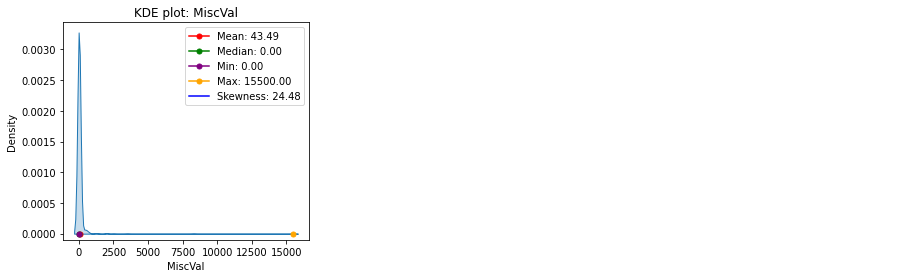

In [57]:
#dictionary to set the offset for y axis
misc_var_dict={'MiscVal':(-0.0001)}

UVA_continuous(df,misc_var,misc_var_dict)

-The average MiscVal for the dataset is 43.49

-The features also shows a very high skewness of 24.48

-In conclusion the MiscVal variable exhibits a highly skewed distribution with the majority of houses having no or low miscellaneous value and a small subset of houses with high miscellaneous values. The presence of houses with high miscellaneous values may indicate the presence of unique features or additional amenities that contribute to their higher value.

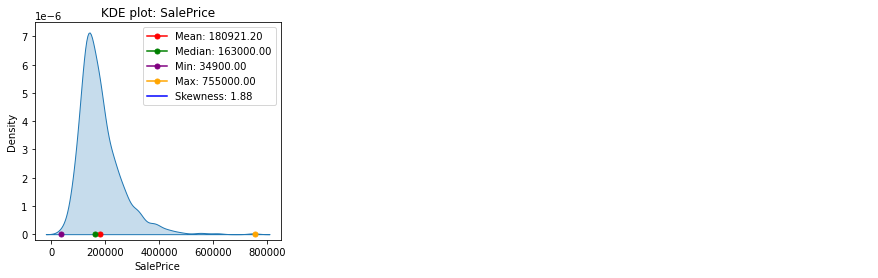

In [58]:
#dictionary to set the offset for y axis
target_var_dict={'SalePrice':(-0.0000002,None)}

UVA_continuous(df,target_var,target_var_dict)

-The mean and median sale prices are close in value, indicating that the distribution of sale prices is not heavily influenced by extreme outliers.

-The presence of positive skewness suggests that there are relatively few houses with very high prices compared to the majority of houses in the dataset.

-The range of sale prices is quite wide, spanning from 34900 to 755000, indicating the presence of houses at both lower and higher price points.

## Univariate Analysis (Categorical features)

In [59]:
# Create an empty list to store object variables
categorical_var = []

# Iterate through columns and check data type
for col in df.columns:
    if df[col].dtype == 'category':
        categorical_var.append(col)

In [60]:
categorical_var

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [61]:
#grouping of categorical variables

lot_var=['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope']
location_var=['Neighborhood','Condition1','Condition2']
building_var=['BldgType','HouseStyle','OverallQual','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
             'ExterCond','Foundation']
cat_bsmt_var=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
heat_air_var=['Heating','HeatingQC','CentralAir']
cat_garage_var=['GarageType','GarageFinish','GarageQual','GarageCond']
sale_var=['SaleType','SaleCondition']
other_cat_var=['Electrical','KitchenQual','Functional','PavedDrive']


In [62]:
def UVA_categorical(data, groups):
    """
    Plot bar plots for groups of categorical variables.
    
    Args:
    - data: DataFrame containing the data
    - groups: List of groups of categorical variables
    
    Returns:
    - Bar plot visualization of each feature in the group with y-axis as density.
    """
    num_groups = len(groups)
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = (num_groups + num_cols - 1) // num_cols  # Number of rows in the subplot grid
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 8 * num_rows))
    fig.subplots_adjust(hspace=0.5)
    
    for i, group in enumerate(groups):
        if num_rows > 1:
            ax = axs[i // num_cols, i % num_cols]
        else:
            ax = axs[i]
        
        counts = data[group].value_counts()
        
        sns.barplot(x=counts.index, y=counts.values, ax=ax)
        
        ax.set_xlabel(group)
        ax.set_ylabel("Density")
        ax.set_title(f"Bar Plot: {group}")
        ax.tick_params(axis='x', rotation=45)
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom')
        
    # Remove any unused subplots
    if num_groups < num_rows * num_cols:
        for i in range(num_groups, num_rows * num_cols):
            if num_rows > 1:
                ax = axs[i // num_cols, i % num_cols]
            else:
                ax = axs[i]
            ax.axis("off")
    
    plt.show()

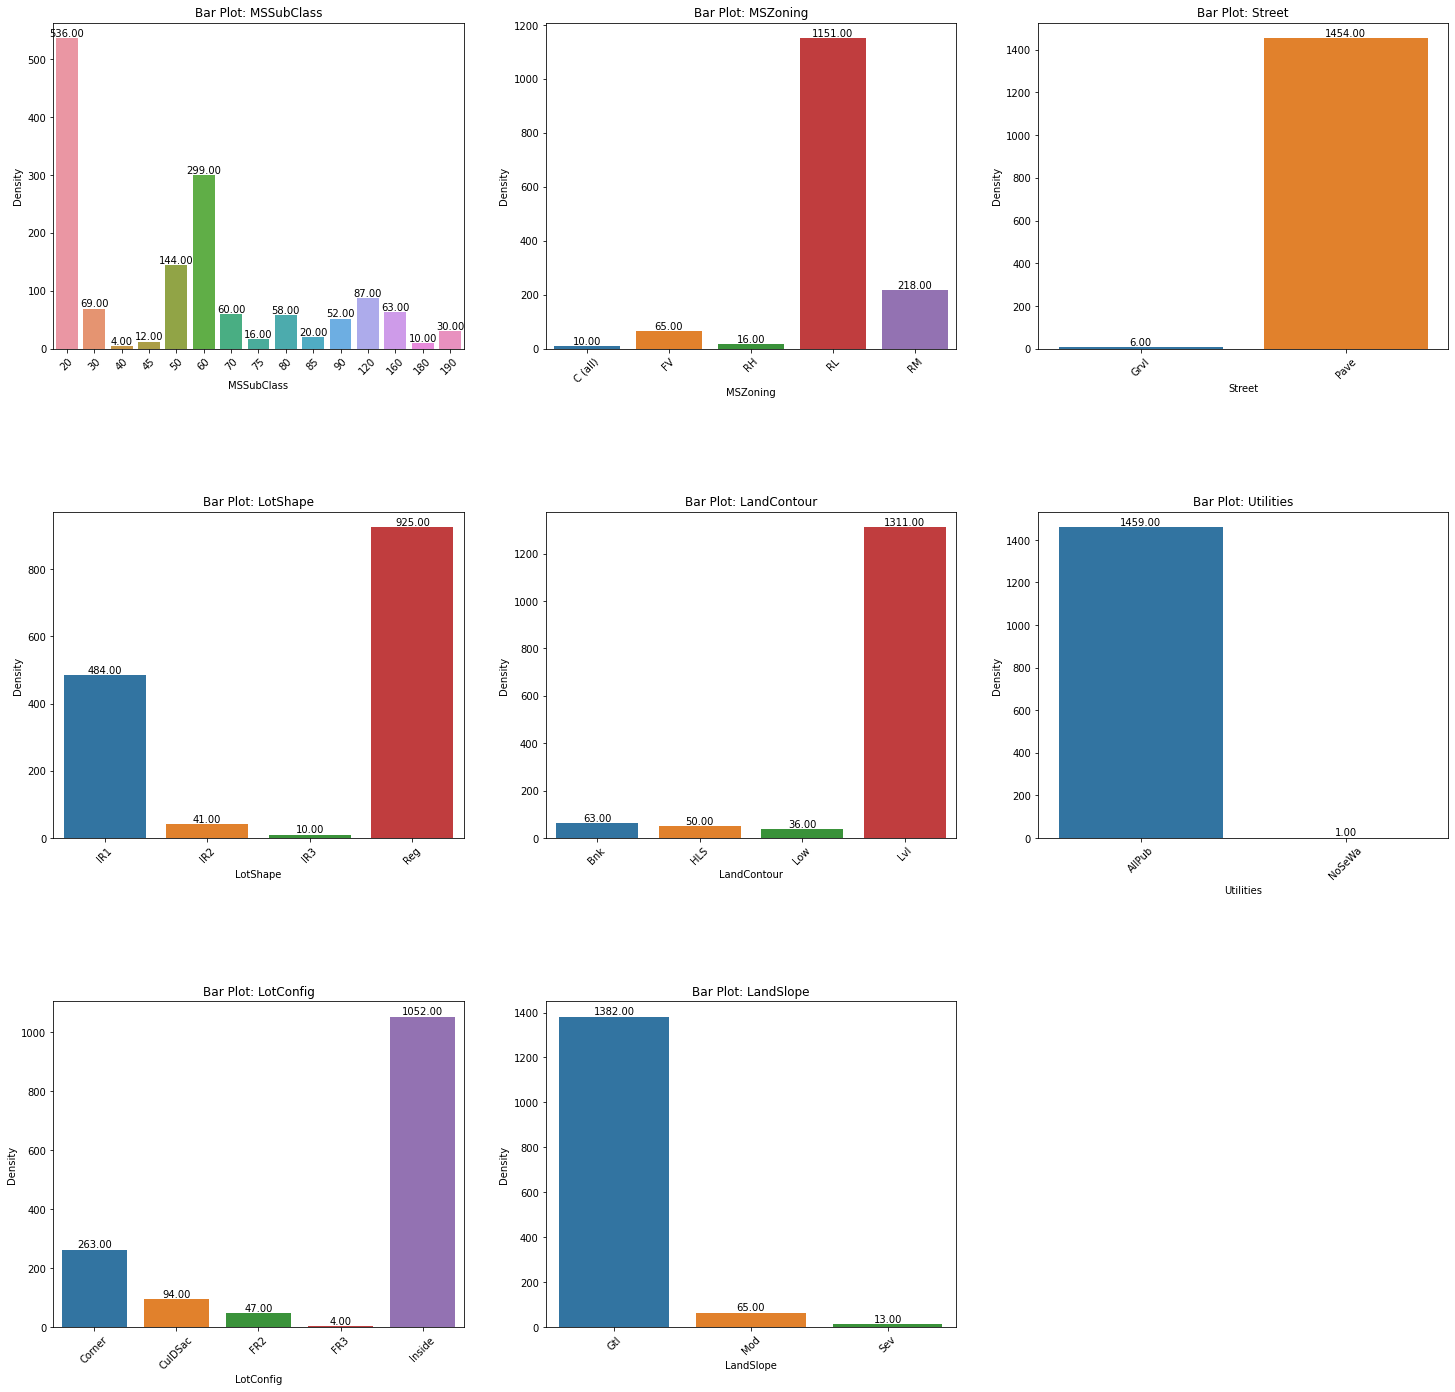

In [63]:
UVA_categorical(df,lot_var)

**MSSubClass**

-The most common type of dwelling is represented by subclass 20, which appears maximum times in the dataset. This subclass likely corresponds to a single-family detached house.

-Subclass 60 is the second most common type. This subclass may represent a two-story house.

-In summary, the MSSubClass feature provides information about the general type or style of each property in the dataset.

**MSZoning**

-The majority of properties in the dataset are classified as RL (Residential Low Density). This zoning classification typically corresponds to areas primarily composed of single-family homes.

-C (all) zoning classification, which stands for Commercial, is the least common, with only 10 instances. These properties are likely located in areas primarily designated for commercial or mixed-use purposes.

**Street**

-The majority of properties have a Pave street type, indicating that these properties have a paved road or street access

-A very small number of properties have a Grvl street type, suggesting that these properties have a gravel road or street access, which are common rural areas or less developed areas, thus we can interpret that most of the houses in our dataset may belong to a developed area

**LotShape**

-The distribution suggests that the majority of properties in the dataset have a regular lot shape.

-However, there is a notable presence of properties with irregular lot shapes, including moderately and highly irregular shapes.

**LandContour**

-The distribution indicates that the majority of properties in the dataset are situated on land with a relatively flat contour. However, there is a presence of properties on sloping terrains, including both gentle slopes and significant slopes.

**Utilities**

-The distribution indicates that the vast majority of properties in the dataset have access to standard public utility services. The presence of only one instance with a different utility option suggests that it is an exception rather than the norm in the dataset.

**LotConfig**

-The distribution provides information about the variety of lot configurations present in the dataset. It indicates that the majority of properties have an Inside lot configuration, followed by Corner and CulDSac configurations. The presence of different lot configurations can impact factors such as accessibility, privacy, and overall appeal of the property.

**LandSlope**

-The distribution of land slope provides information about the variability in the terrain of the properties in the dataset. It suggests that the majority of properties have a gentle slope, followed by properties with a moderate slope. The presence of different land slopes can impact factors such as drainage, landscaping possibilities, and the overall aesthetic appeal of the property.

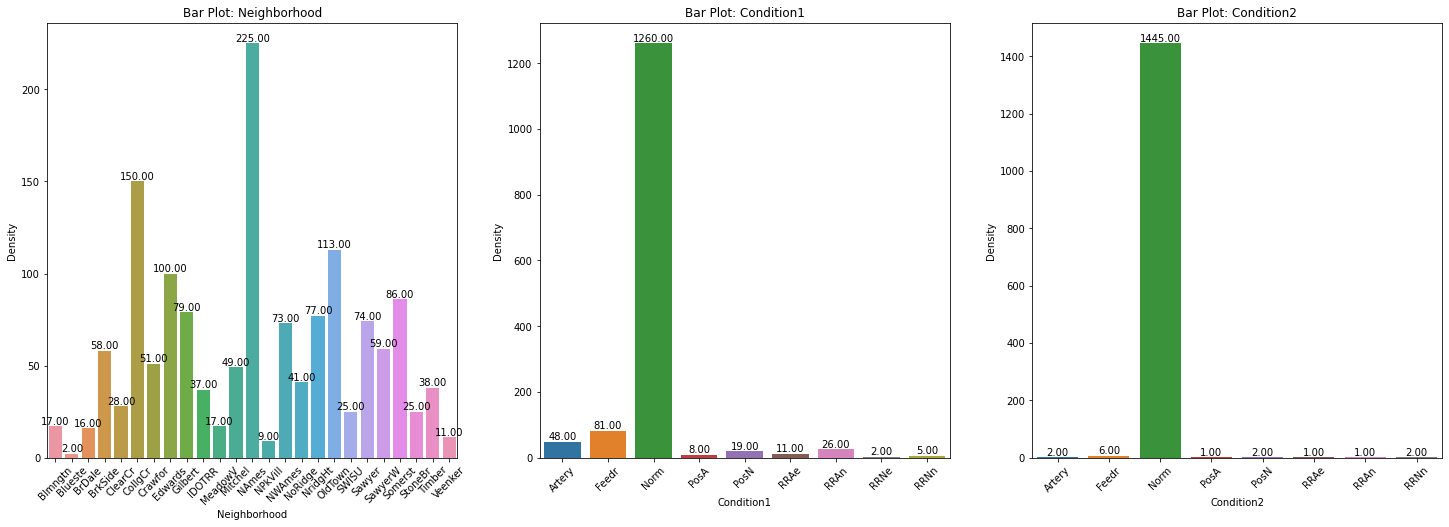

In [64]:
UVA_categorical(df,location_var)

**Neighborhood**

-The distribution of neighborhoods provides insights into the composition of the dataset and the representation of different neighborhoods. It can be used to understand the popularity or prevalence of certain neighborhoods which turns out to be the NAmes Neighborhood in the dataset.

-Additionally, this information can be helpful in identifying patterns or trends specific to different neighborhoods during the analysis and modeling process.

**Condition1**

-The most common condition is "Norm" with 1260 instances. This suggests that the majority of properties in the dataset are located in areas with a normal or standard condition.

-Other conditions such as "Feedr", "Artery", "RRAn", "PosN", "RRAe", "PosA", "RRNn", and "RRNe" have lower frequencies. This indicates that these conditions are less common in the dataset.

**Condition2**

-The Condition2 features's distribution is quite similiar to the Condition1 feature with defference in the count

-So if needed we can use only one variable out of the both during further analysis and model building process

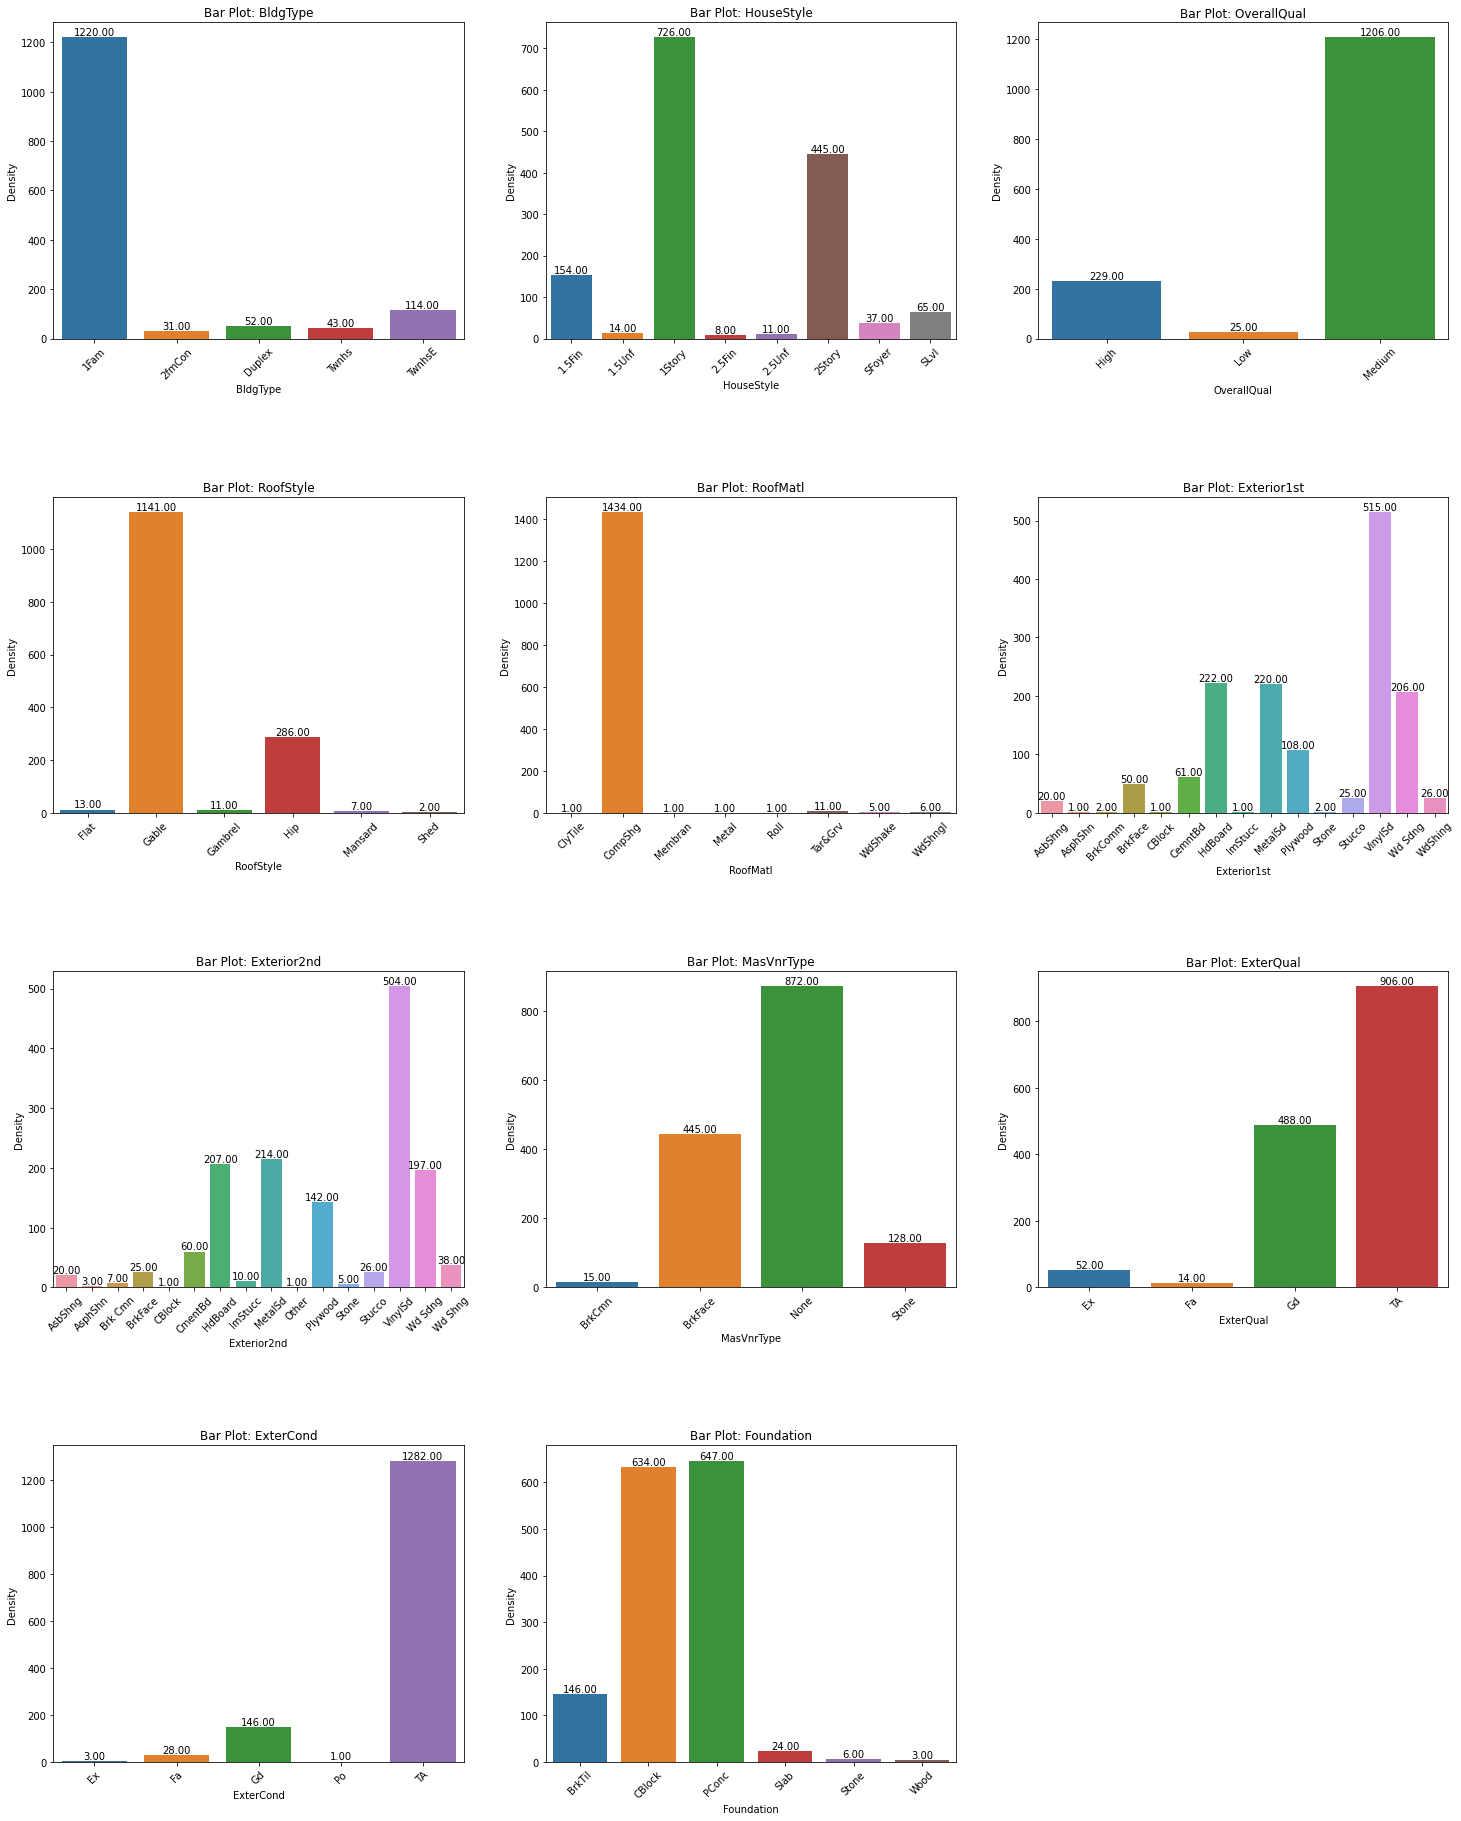

In [65]:
UVA_categorical(df,building_var)

## Based on the above visualisations following inferences can be made:

**BldgType**

-The 1Fam (Single-family detached) has the highest count, this suggests that it is the most widely observed building type in the dataset. This information indicates that the majority of the observations correspond to single-family homes.

-The relatively low counts for the other categories (2fmCon, Duplex, Twnhs, TwnhsE) suggest that these building types are less common in the dataset. These categories represent multi-family dwellings or townhouses, which might be less prevalent compared to single-family homes.

-The dominance of the 1Fam category can also indicate a potential market preference or higher demand for single-family homes.

**HouseStyle**

-The fact that 1Story has the highest density suggests that it is the most prevalent house style in the dataset.The high count for 2Story (Two story) also indicates its popularity as a house style choice

-The relatively lower density for features like 1.5Fin, 1.5Unf, 2.5Fin, 2.5Unf, SFoyer (Split Foyer), and SLvl (Split Level) suggest that these house styles are less commonly found in the dataset. This could be due to various reason, on of which could be that these house styles might cater to specific niche markets or have unique architectural features that appeal to a smaller segment of buyers.

**OverallQual**

-The higher density of the Medium category and the presence of a considerable density for the High category highlight the importance of overall quality as a feature in determining the property's value or desirability. The overall quality rating likely plays a significant role in the assessment and pricing of properties.

**RoofStyle**

-The most common roof style is Gable with 1141 instances. This suggests that the majority of properties in the dataset have a gable roof, which is a popular and traditional roof style.

-Hip is the second most common roof style with 286 instances. Hip roofs are known for their sloping sides, and their presence in a significant number of properties indicates their popularity in the dataset.

**RoofMatl**

-The most common roofing material is CompShg (Composite Shingle) with 1434 instances. This suggests that the majority of properties in the dataset have composite shingle roofs, which is a popular and widely used roofing material due to its affordability and durability.

**Exterior1st**

-The most common exterior covering material for the 1st exterior wall is VinylSd (Vinyl Siding) with 515 instances. Vinyl siding is a popular choice for its durability, versatility, and relatively low maintenance requirements.

-Other common exterior materials include HdBoard (Hardboard), MetalSd (Metal Siding), and Wd Sdng (Wood Siding) with frequencies of 222, 220, and 206 respectively. These materials are also commonly used in residential construction.

-Rest of the materials may be less commonly used or represent specific architectural styles or preferences.

**Exterior2nd**

-The distribution of exterior covering material for the 2nd exterior wall is similiar to the Exterior1st 

**MasVnrType**

-The majority of houses (864 instances) do not have a masonry veneer type (None). This means that these houses do not have any external layer of brick, stone, or similar material covering the walls.

-The second most common masonry veneer type is BrkFace (Brick Face), with 445 instances. This indicates that a significant number of houses in the dataset have a brick veneer covering the exterior walls.

-However its also observed that there are no houses in the dataset with Brick Common (BrkCmn) type

**ExterQual**

-The majority of houses (906 instances) have a TA (Typical/Average) exterior quality rating. This suggests that the external material and finish of these houses are of average quality and meet the standard expectations

-A significant number of houses (488 instances) have a Gd (Good) exterior quality rating. This indicates that these houses have a higher quality of exterior material and finish compared to the average houses, potentially providing enhanced durability and aesthetic appeal.

**ExterCond**

-The distribution of of External material condition is much similiar to ExterQual with less numbers

**Foundation**

-The majority of houses (647 instances) have a PConc (Poured Concrete) foundation. 

-A significant number of houses (634 instances) have a CBlock (Concrete Block) foundation

-A smaller number of houses (146 instances) have a BrkTil (Brick and Tile) foundation. 

-There are a few instances with less common foundation types. This includes 24 houses with a Slab foundation, 6 houses with a Stone foundation, and 3 houses with a Wood foundation.

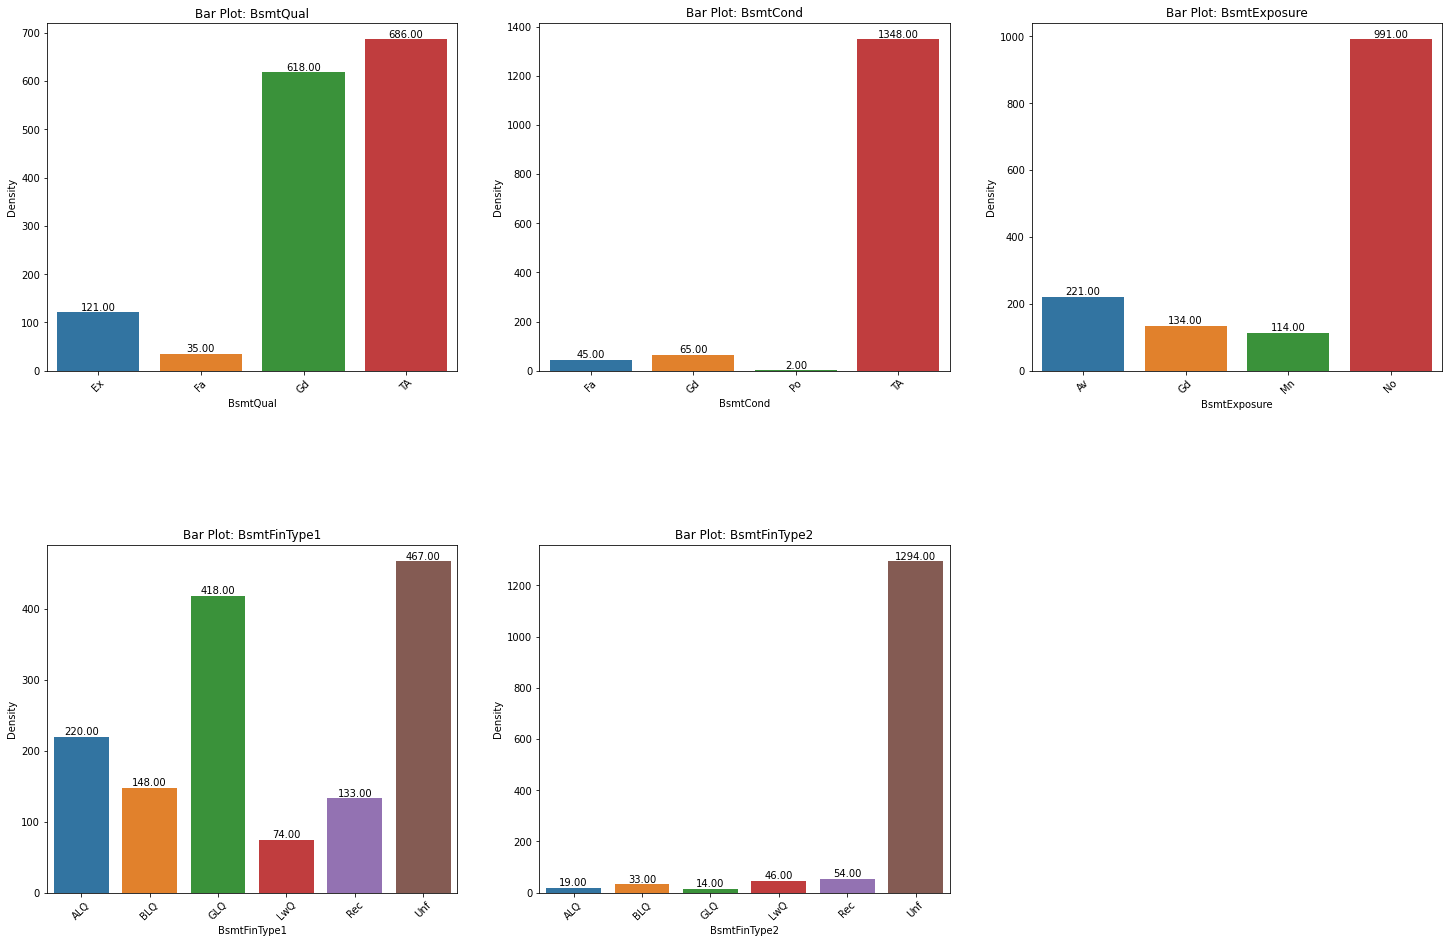

In [66]:
UVA_categorical(df,cat_bsmt_var)

**BsmtQual**

-From the visualisation , we can infer that the majority of houses have a decent or good basement quality. Houses with excellent basement quality are relatively fewer in number

-While houses with fair basement quality are the least common.

**BsmtCond**

-From the visualization, we can infer that most houses have a typical or average basement condition. 

-There are relatively few houses with good or fair basement conditions, and a very small number with poor conditions.

**BsmtExposure**

-The majority of houses have basements without any exposure to the exterior. This could be due to architectural design or the location of the house.

-Houses with higher levels of exposure ("Av", "Gd", "Mn") may have additional features or benefits associated with the basement, which could potentially influence the sale price.

-The level of basement exposure could be a relevant factor to consider when analyzing the relationship between "BsmtExposure" and the target variable "SalePrice"

**BsmtFinType1**

-The presence of a significant number of unfinished basements may indicate that some houses are either under construction or the homeowners have not completed the basement finishing.

-Houses with higher-quality living quarters in the basement (such as "GLQ" and "ALQ") may be more desirable and potentially command a higher sale price.

**BsmtFinType2**

-The presence of a significant number of unfinished second basement areas may indicate that the homeowners have not completed the finishing or utilization of this space.

-The level of finishing in the second basement area "BsmtFinType2" may not have as strong of an impact on the overall value or desirability of the house as the main basement area "BsmtFinType1".


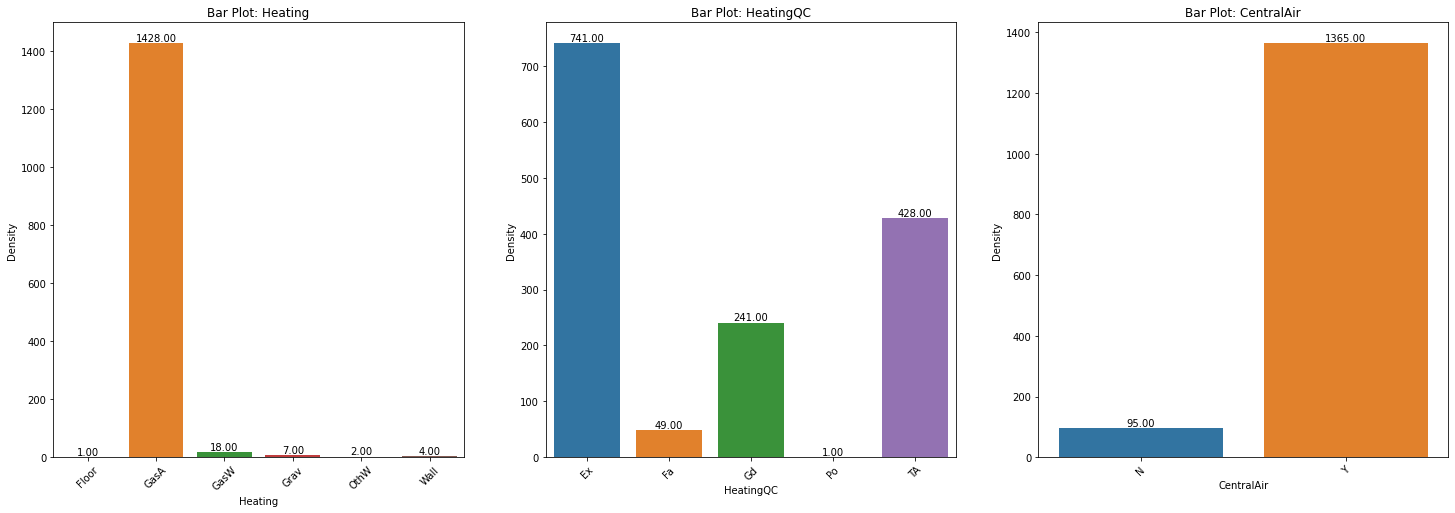

In [67]:
UVA_categorical(df,heat_air_var)

**Heating**

-The presence of a gas forced warm air furnace ("GasA") as the most common heating system suggests that it is the standard or preferred choice for heating in the houses.

-The relatively low number of houses with alternative heating systems indicates that they are less common or less preferred options.

-The specific type of heating system may not have a significant impact on the overall value or desirability of the house, as long as it provides efficient and effective heating.

**HeatingQC**

-The majority of houses have an excellent or good heating quality rating, indicating that the heating systems in these houses are in good condition and provide efficient heating.

-The relatively low number of houses with fair or poor heating quality ratings suggests that most houses have heating systems that meet or exceed expectations in terms of quality and performance.

-The heating quality rating may be a significant factor in the overall desirability and value of a house, as a higher rating indicates better heating performance and comfort.

**CentralAir**

-Central air conditioning is a common feature among the houses in the dataset, as a large majority of houses have it.

-The presence of central air conditioning may be a factor that positively influences the desirability and value of a house in the real estate market.

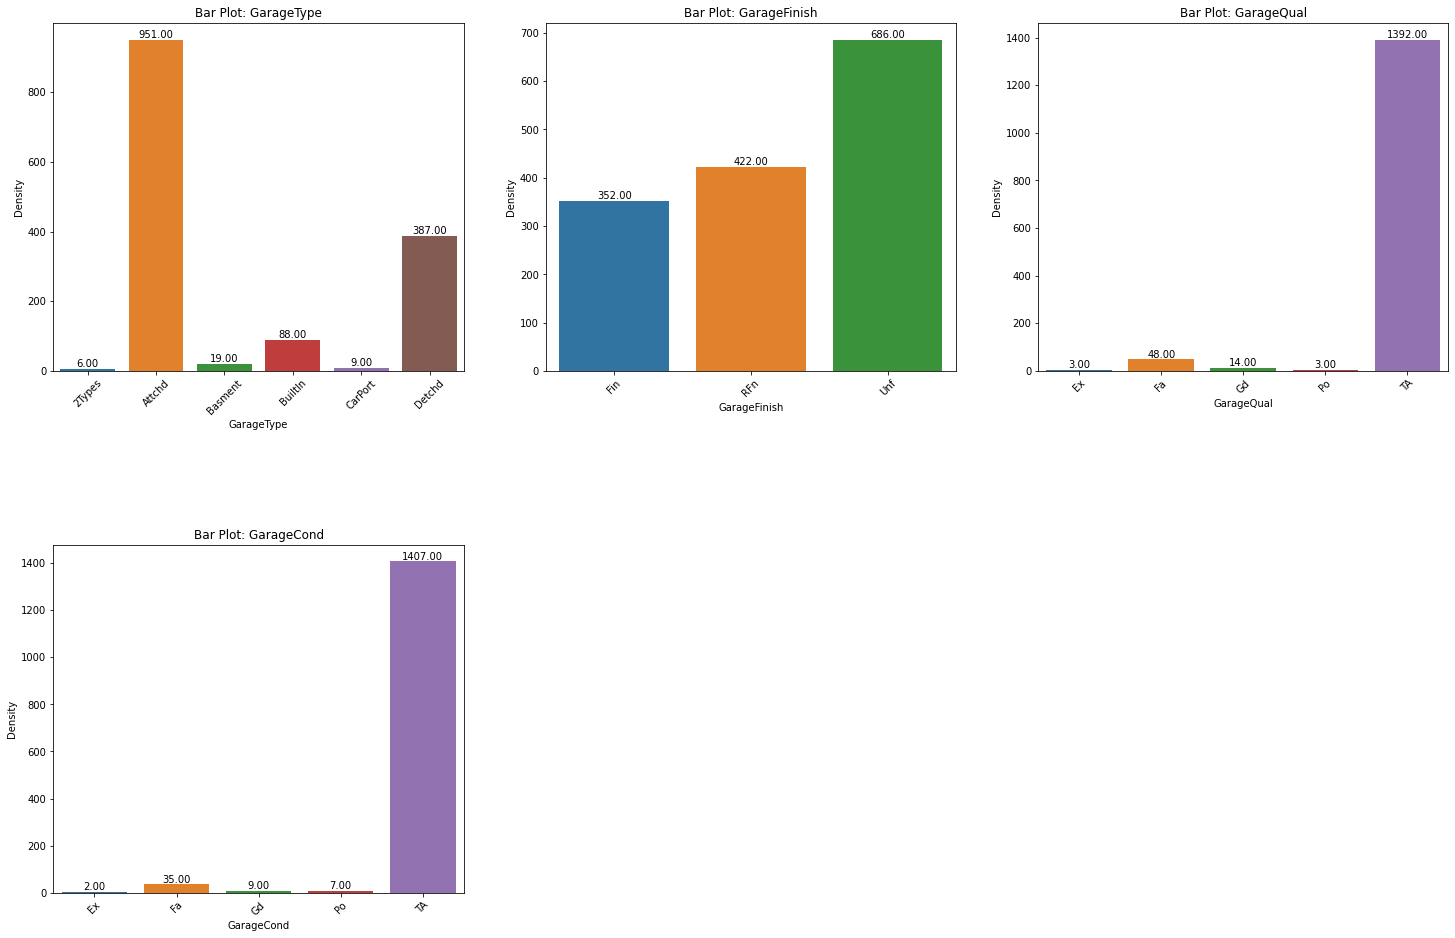

In [68]:
UVA_categorical(df,cat_garage_var)

**GarageType**

-Attached garages (Attchd) are the most prevalent type in the dataset, indicating that many houses have garages directly attached to the main structure.

-Detached garages (Detchd) are also quite common, but less prevalent than attached garages.

-Other types of garages (Basment, CarPort, 2Types) are relatively rare in the dataset.

-The presence of a garage, regardless of the type, is generally considered a desirable feature in the housing market, so we should definately analyse this variable with the target variable later in the bivariate analysis

**GarageFinish**

-A significant number of houses have unfinished garages (Unf), indicating that the interior of the garage is not fully completed.

-Rough finished garages (RFn) are also quite common, suggesting that some level of finishing work has been done, but it may not be as refined as a fully finished garage.

-Finished garages (Fin) are less prevalent compared to the other types, suggesting that a smaller proportion of houses have a fully completed and refined garage interior.

**GarageQual**

-There are relatively few houses with ratings other than "TA," suggesting that a smaller proportion of houses have garages with exceptional (Ex), good (Gd), poor (Po), or fair (Fa) quality.

-The presence of houses with poor or fair garage quality ratings (Po and Fa) may indicate that these garages have notable deficiencies or issues that may affect their functionality or condition.

**GarageCond**

-Its distribution is quite similiar to GarageQual with different counts

-When considering the relationship between the "GarageCond" feature and the target variable "SalePrice", it's important to note that garage condition can be a significant factor in determining the overall value of a property. 

-Houses with garages in better condition may generally command higher prices, while houses with garages in poorer condition may have reduced market appeal.

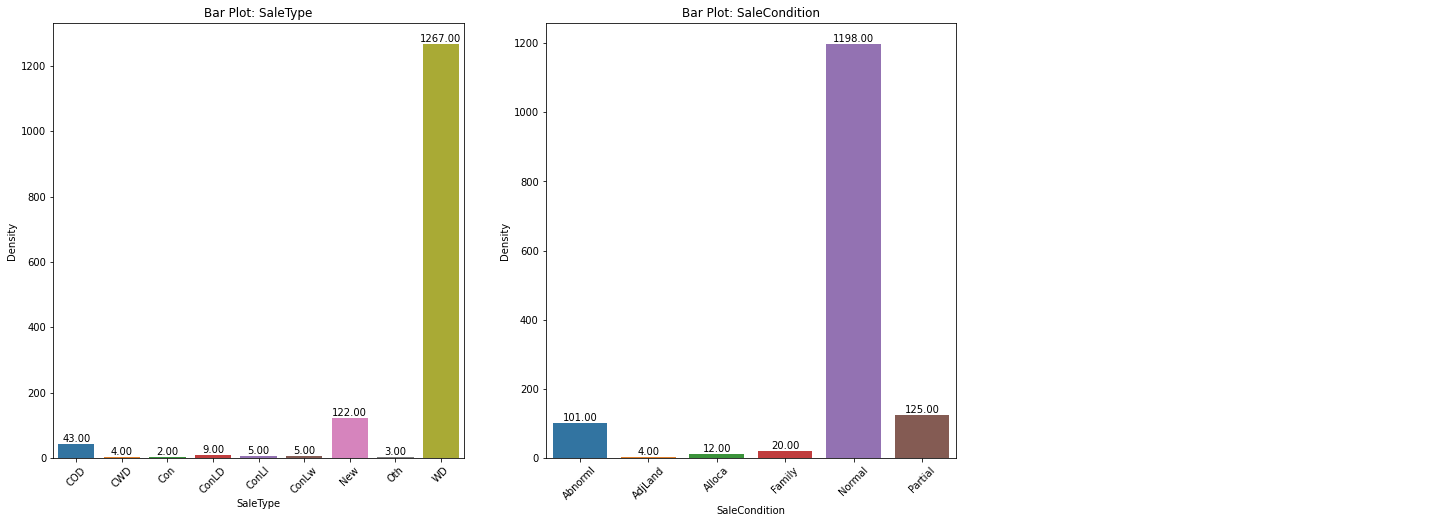

In [69]:
UVA_categorical(df,sale_var)

**SaleType**

-The majority of houses in the dataset are sold through warranty deed (WD), which is a common and conventional type of sale.

-There is a smaller proportion of houses sold as new constructions, indicating a subset of houses that are newly built and sold.

-The occurrences of other sale types are relatively low, suggesting that they represent a smaller portion of the overall dataset.

**SaleCondition**

-The majority of houses in the dataset have a "Normal" sale type, indicating that they were sold under standard market conditions.

-There is a subset of houses with "Partial" and "Abnorml" sale types, suggesting that these sales may involve unfinished homes or involve abnormal circumstances such as foreclosure or trade.

-The occurrences of other sale types "Family," "Alloca," and "AdjLand" are very low.

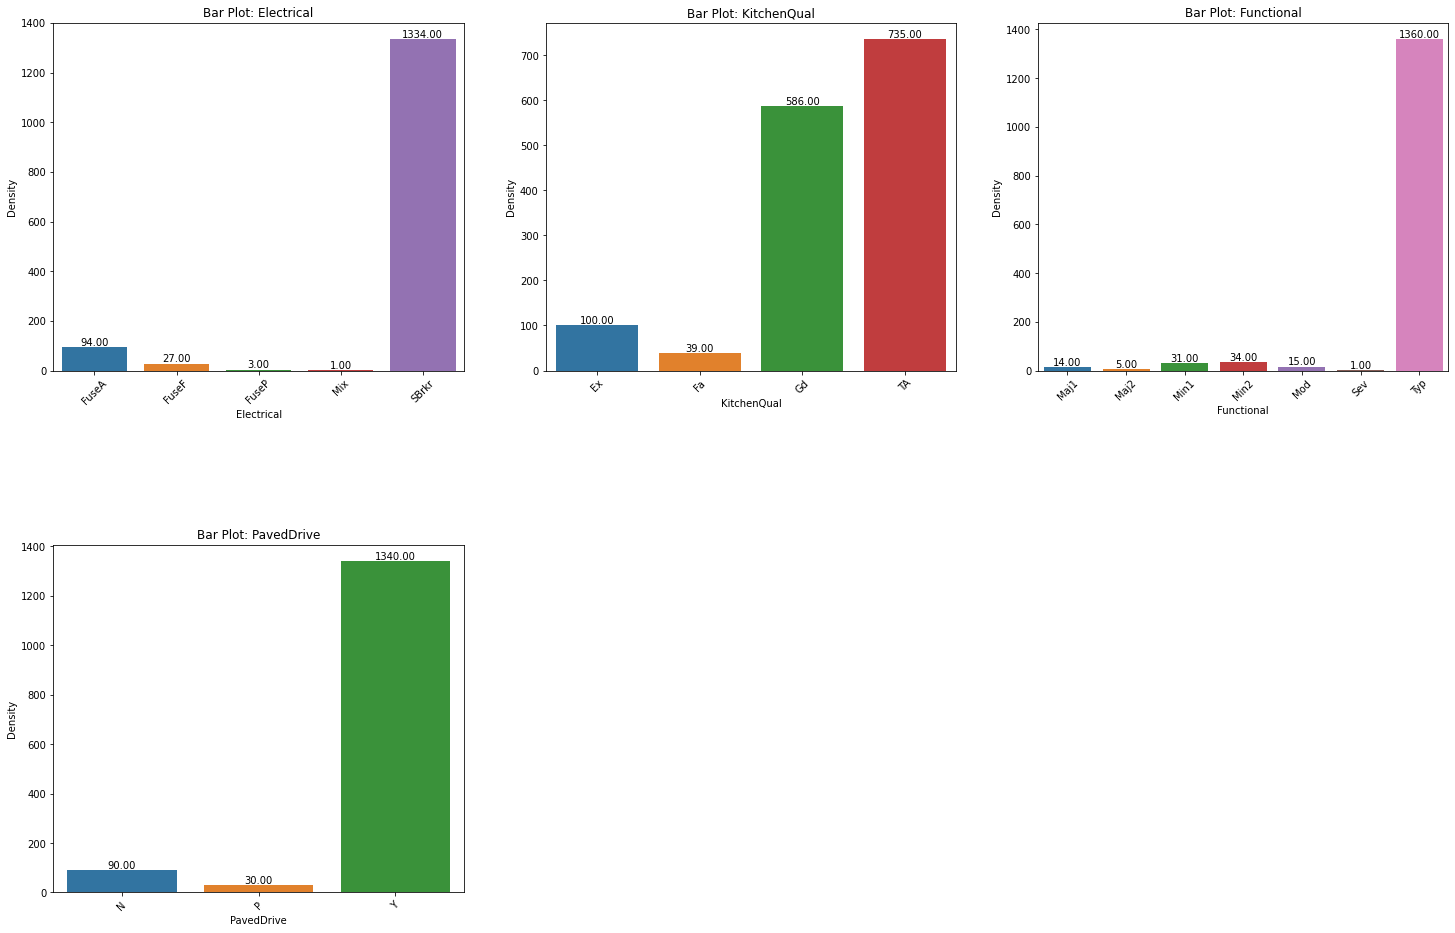

In [70]:
UVA_categorical(df,other_cat_var)

**Electrical**

-The majority of houses in the dataset have the "SBrkr" electrical system, which is considered a modern and standard electrical system.

-The presence of a smaller number of houses with "FuseA" and "FuseF" electrical systems suggests that some houses in the dataset may have older electrical systems that may require further inspection or potential upgrades.

-Occurence of other categories are ver less


**KitchenQual**

-The majority of houses in the dataset have kitchens with average or typical quality.

-Houses with kitchens rated as excellent may have higher market value or appeal due to their high-quality kitchen features.

-Houses with fair-rated kitchens may require renovations or updates to improve the kitchen's functionality and appeal.

**Functional**

-The majority of houses have typical functionality, which is expected for a standard dwelling.

-Other categories do not contribute much to the distribution

**PavedDrive**

-Houses with a paved driveway (category "Y") are more common and likely more desirable to buyers. 

-Houses without a paved driveway (category "N") may have a less finished or less convenient driveway

-Houses with a partially paved driveway (category "P") may have a mix of paved and unpaved surfaces, which could indicate a need for repairs or improvements to the driveway.

In [71]:
df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [72]:
# builiding_structure_var=['MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','AgeOfHouse','YearsSinceRemodel']

# location_lot_var = ['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
#                      'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2']

# roof_var= ['RoofStyle', 'RoofMatl']

# exterior_var = ['Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond']

# basement_var = ['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 
#                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

# heating_ac_var = ['Heating', 'HeatingQC', 'CentralAir']

# room_var = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath',
#              'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional']

# fireplace_var = ['Fireplaces', 'FireplaceQu']

# garage_var = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']

# other_features_var = ['PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea',
#                        'PoolQC', 'Fence', 'MiscFeature', 'MiscVal']

# sale_var = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']

## Bivariate Analysis (Continuous vs Target variable)

In [73]:
lot_var=['LotFrontage','LotArea']
mansion_var=['MasVnrArea']
bsmt_var=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
bathroom_var=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']
floor_var=['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea']
building_var=['OverallCond','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces']
garage_var=['GarageYrBlt','GarageArea']
outdoor_var=['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GarageCars','PoolArea']
time_var=['MoSold','AgeOfHouse','YearsSinceRemodel','YrSold']
misc_var=['MiscVal']
target_var=['SalePrice']

In [74]:
def calculate_correlation(data, variables, target_variable):
    '''
    Calculate the correlation between variables and the target variable.

    Args:
        data (DataFrame): The dataframe containing the data.
        variables (list): List of variables.
        target_variable (str): The target variable to calculate the correlation with.

    Returns:
        DataFrame: The correlation matrix between the variables and the target variable.
    '''

    correlation_matrix = data[variables + [target_variable]].corr()
    correlation_matrix = correlation_matrix[[target_variable]]

    return correlation_matrix

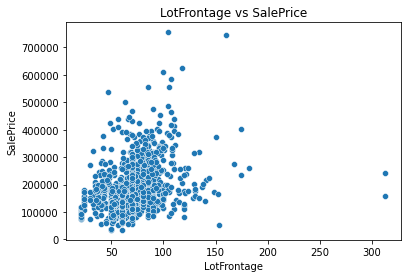

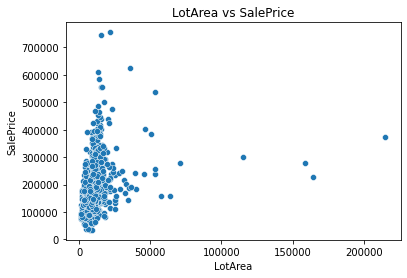

In [75]:
for var in lot_var:
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(var + ' vs SalePrice')
    plt.show()

In [76]:
calculate_correlation(df,lot_var,'SalePrice')

,SalePrice
LotFrontage,0.334901
LotArea,0.263843
SalePrice,1.000000


**LotFrontage**

-The scatterplot of LotFrontage vs SalePrice indicates a not so strong positive correlation 

-This can be confirmed by the correlation matrix 

**LotArea**

-Its scatterplot does not indicate much of a relationship except some of the points increasing with the increase in SalePrice

-The correlation matrix confirms that as its value is around 0.26 however its not that strong correlation to be considered

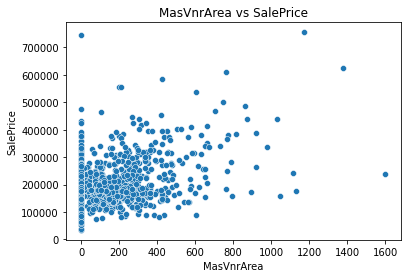

In [77]:
for var in mansion_var:
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(var + ' vs SalePrice')
    plt.show()

In [78]:
calculate_correlation(df,mansion_var,'SalePrice')

,SalePrice
MasVnrArea,0.475241
SalePrice,1.000000


**MasVnrArea**

-The scatterplot shows that there has been a small increase in the SalePrice

-The correlation matrix shows a correlation of 4.75 between the MasVnrArea and SalePrice

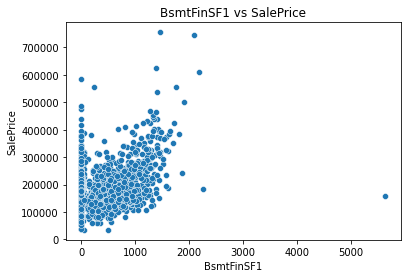

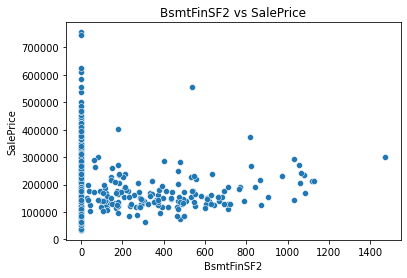

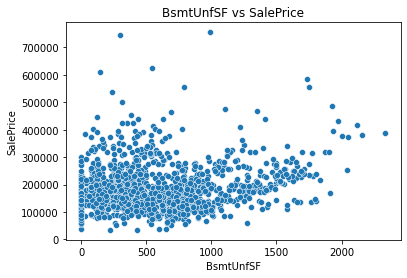

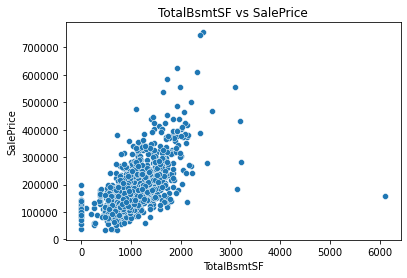

In [79]:
for var in bsmt_var:
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(var + ' vs SalePrice')
    plt.show()

In [80]:
calculate_correlation(df,bsmt_var,'SalePrice')

,SalePrice
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378
BsmtUnfSF,0.214479
TotalBsmtSF,0.613581
SalePrice,1.000000


-The scatterplots show that TotalBsmtSF has the strongest association with the SalePrice which can be confirmed by the correlation value of 0.61 

-Also since it was observed during the univariate analysis that TotalBsmtSF is the sum of the other 3 variables we can only consider TotalBsmtSF during the model building process

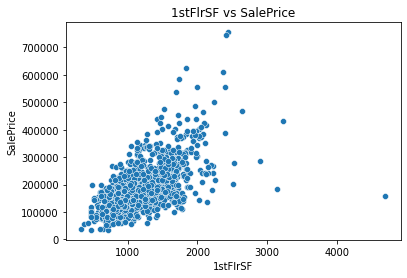

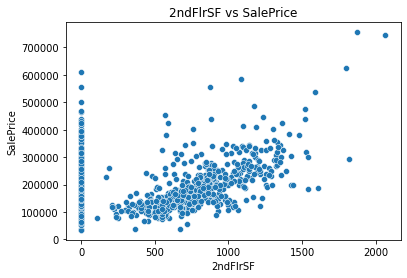

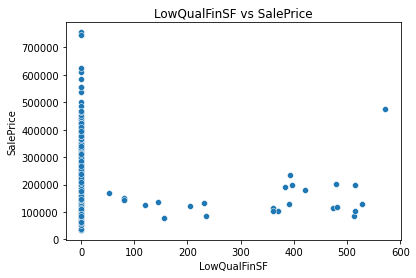

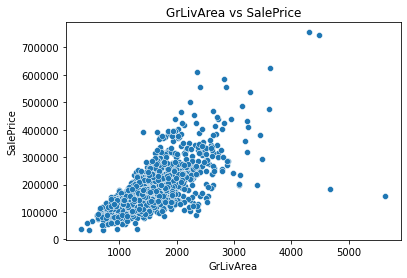

In [81]:
for var in floor_var:
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(var + ' vs SalePrice')
    plt.show()

In [82]:
calculate_correlation(df,floor_var,'SalePrice')

,SalePrice
1stFlrSF,0.605852
2ndFlrSF,0.319334
LowQualFinSF,-0.025606
GrLivArea,0.708624
SalePrice,1.000000


-The scatter plot depicts that 1stFlrSF and GrLivArea have a strong positive association with the SalePrice feature

-The 2ndFlrSF feature also show quite a positive association except a major subgroup is clustered around zero indicating that a group of houses don't have second floor

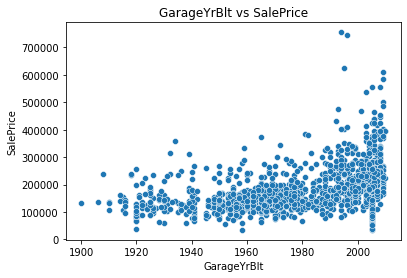

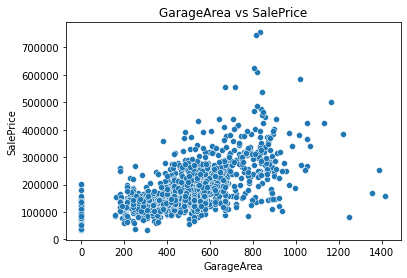

In [83]:
for var in garage_var:
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(var + ' vs SalePrice')
    plt.show()

In [84]:
calculate_correlation(df,garage_var,'SalePrice')

,SalePrice
GarageYrBlt,0.397778
GarageArea,0.623431
SalePrice,1.000000


-GarageYrBlt vs SalePrice scatterplot do not indicate any trend or pattern between them

-The GarageArea vs SalePrice scatterplot however shows a strong positive correlation between them

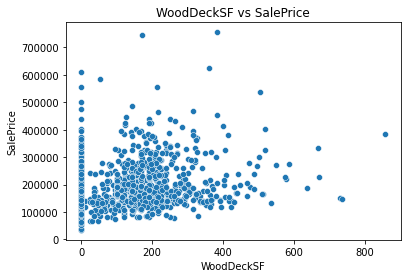

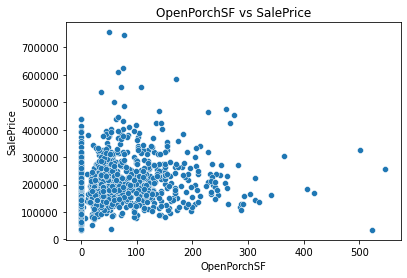

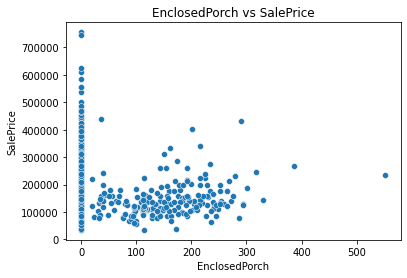

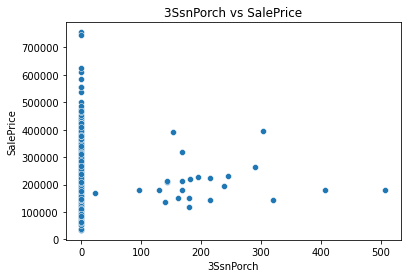

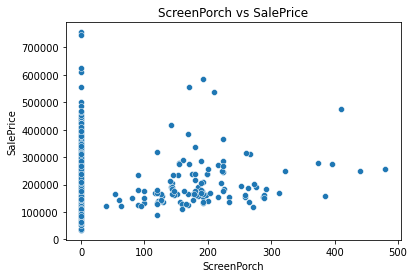

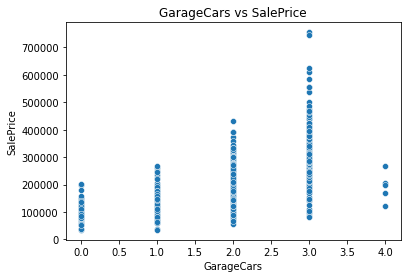

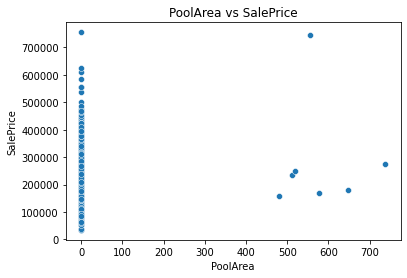

In [85]:
for var in outdoor_var:
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(var + ' vs SalePrice')
    plt.show()

In [86]:
calculate_correlation(df,outdoor_var,'SalePrice')

,SalePrice
WoodDeckSF,0.324413
OpenPorchSF,0.315856
EnclosedPorch,-0.128578
3SsnPorch,0.044584
ScreenPorch,0.111447
GarageCars,0.640409
PoolArea,0.092404
SalePrice,1.000000


-All the variables in the outdoor_var group don't show an evident strong association with the SalePrice feature except the GarageCars feature

-The scatterplot indicates a increase in the SalePrice with the inrasing capacity of cars in the garage which makes sense as well

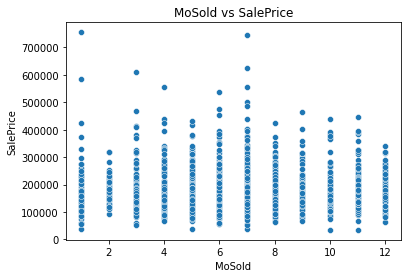

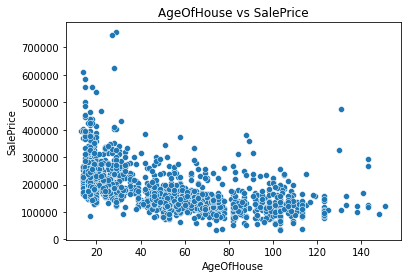

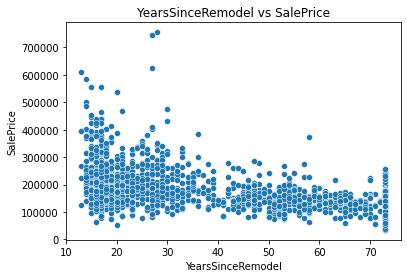

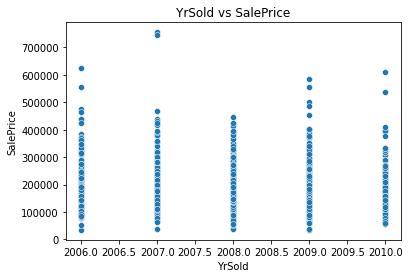

In [87]:
for var in time_var:
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(var + ' vs SalePrice')
    plt.show()

In [88]:
calculate_correlation(df,time_var,'SalePrice')

,SalePrice
MoSold,0.046432
AgeOfHouse,-0.522897
YearsSinceRemodel,-0.507101
YrSold,-0.028923
SalePrice,1.000000


-In the time related feature group only the AgeOfHouse and YearsSinceRemodel show a negative association with the SalePrice as the scatterplot  shows that the SalePrice decreases with the increase in these two variables

-This inference becomes more evident as the worth of the house may decrease if the house is old or not rennovated recently

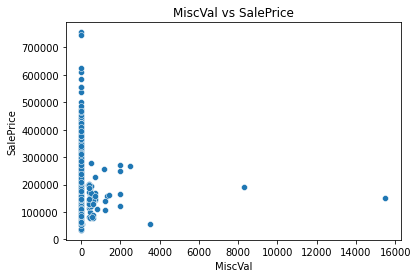

In [89]:
for var in misc_var:
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(var + ' vs SalePrice')
    plt.show()

In [90]:
calculate_correlation(df,misc_var,'SalePrice')

,SalePrice
MiscVal,-0.02119
SalePrice,1.00000


-The MiscVal vs SalePrice scatterplot does not show any type of relationship of MisvVal with the target variable

## Bivariate Analysis (Continous vs Target variable)

When one variable is categorical and another is non-categorical, we can determine how much statistical dispersion across all values can be explained by dispersion among the categories.

The correlation ratio (eta) can be used to see if one or more categories have more influence among all categories.

A value closer to 0 indicates all categories have similar values, and any single category doesn’t have more influence on variable and in our case SalePrice 

We can also observe whether the categories have similiar values using boxplot. If the boxplots of various categories overlap with each other it means that the categories have similar values

In [91]:
cat_lot_var=['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope']
cat_location_var=['Neighborhood','Condition1','Condition2']
cat_building_var=['BldgType','HouseStyle','OverallQual','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                  'ExterQual','ExterCond','Foundation']
cat_bsmt_var=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
cat_heat_air_var=['Heating','HeatingQC','CentralAir']
cat_garage_var=['GarageType','GarageFinish','GarageQual','GarageCond']
cat_sale_var=['SaleType','SaleCondition']
other_cat_var=['Electrical','KitchenQual','Functional','PavedDrive']


In [92]:
def BVA_boxplot(data, var_group):
    '''
    Univariate_Analysis_boxplot:
    Takes a group of categorical variables and plots boxplots

    data : dataframe from which to plot from
    var_group : {list} type Group of categorical variables
    '''

    size = len(var_group)
    plt.figure(figsize=(7 * size, 4), dpi=100)

    # Looping for each variable
    for j, i in enumerate(var_group):
        # Plotting the variable
        plt.subplot(1, size, j + 1)
        sns.boxplot(x=i, y='SalePrice', data=data)
        plt.xlabel('{}'.format(i))
        plt.ylabel('Sale Price')

    plt.tight_layout()
    plt.show()

In [93]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)

    for i in range(cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)

    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))

    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)

    return eta

In [94]:
    def calculate_eta(df, categorical_vars, target_var):
        '''
        Calculate the Eta coefficient (correlation ratio) between categorical variables and a continuous target variable.

        Args:
            df (DataFrame): The dataframe containing the data.
            categorical_vars (list): List of categorical variables.
            target_var (str): The continuous target variable.

        Returns:
            DataFrame: The Eta coefficients between the categorical variables and the target variable.
        '''
        eta_values = []

        for var in categorical_vars:
            eta = correlation_ratio(df[var], df[target_var])
            eta_values.append(eta)

        eta_df = pd.DataFrame({'Variable': categorical_vars, 'Eta': eta_values})
        eta_df.sort_values(by='Eta', ascending=False, inplace=True)
        eta_df.reset_index(drop=True, inplace=True)

        return eta_df

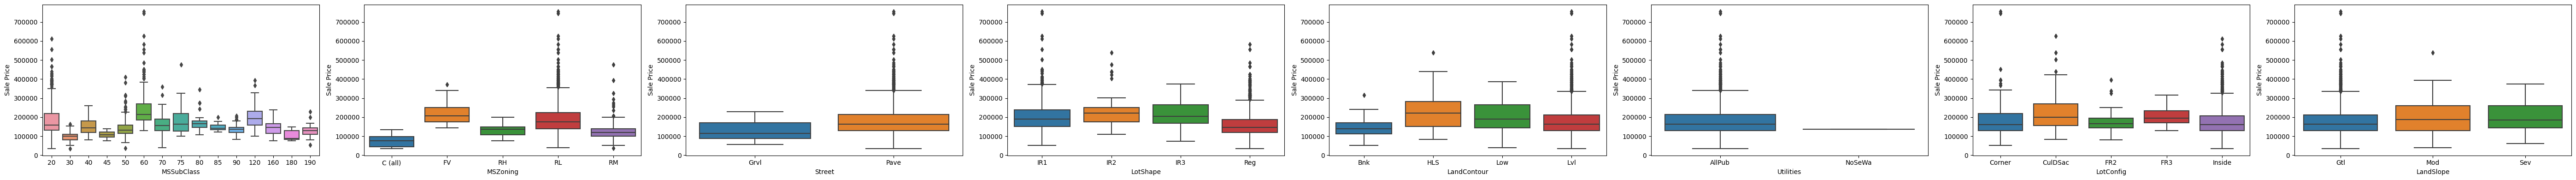

In [95]:
BVA_boxplot(df,cat_lot_var)

In [96]:
calculate_eta(df,cat_lot_var,'SalePrice')

,Variable,Eta
0,MSSubClass,0.496302
1,MSZoning,0.327963
2,LotShape,0.276362
3,LandContour,0.160605
4,LotConfig,0.144981
5,LandSlope,0.051784
6,Street,0.041036
7,Utilities,0.014314


-Out of all the variables MSSubClass feature have strong ETA correlation with 'SalePrice'

-Other features such as 'Street' 'Utilities' have the least ETA also the boxplots of these features overlap with each other

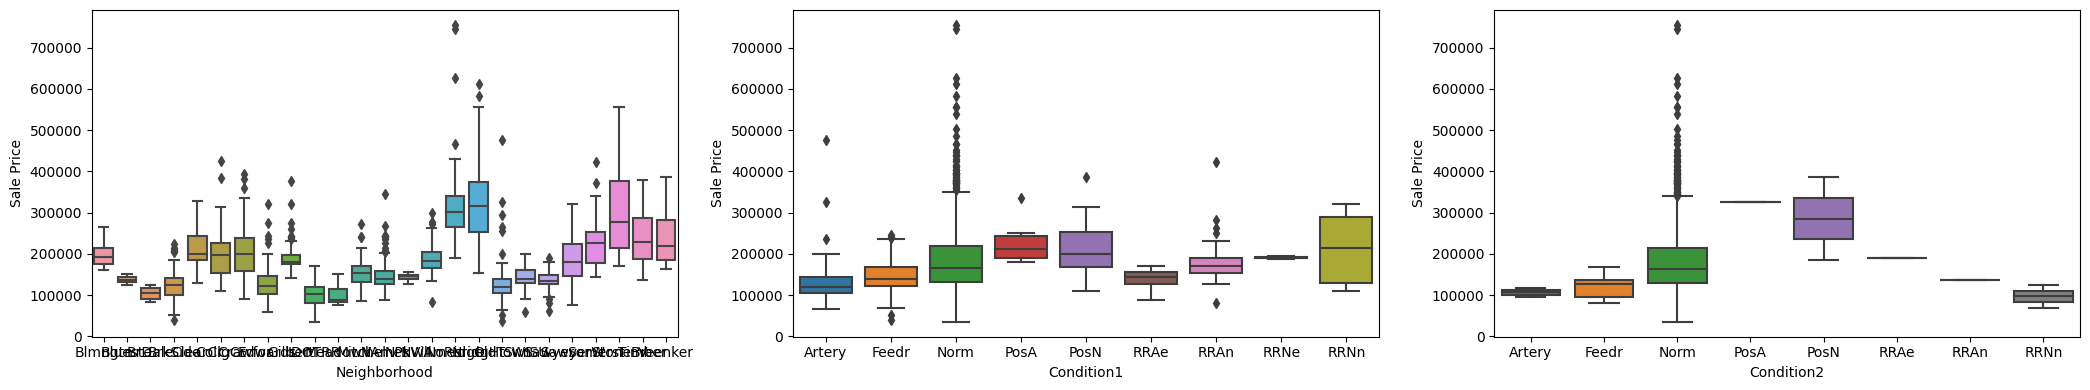

In [97]:
BVA_boxplot(df,cat_location_var)

In [98]:
calculate_eta(df,cat_location_var,'SalePrice')

,Variable,Eta
0,Neighborhood,0.738630
1,Condition1,0.180640
2,Condition2,0.099495


-Even though 'Neighborhood' feature have some wide boxplots the ETA coefficient of it is quite high indicating a strong association with the 'SalePrice' (target variable)

-The neighborhood in which a property is located can provide valuable information about the surrounding amenities, infrastructure, and overall desirability of the area. 

-Different neighborhoods can have varying characteristics such as proximity to schools, parks, shopping centers, transportation, and safety.

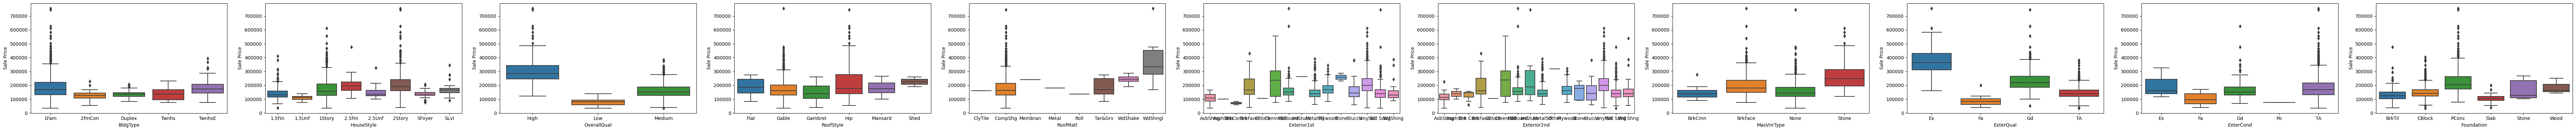

In [99]:
BVA_boxplot(df,cat_building_var)

In [100]:
calculate_eta(df,cat_building_var,'SalePrice')

,Variable,Eta
0,ExterQual,0.690933
1,OverallQual,0.686351
2,Foundation,0.506328
3,MasVnrType,0.428108
4,Exterior2nd,0.392211
5,Exterior1st,0.390862
6,HouseStyle,0.293790
7,RoofStyle,0.240201
8,BldgType,0.185833
9,RoofMatl,0.177237


 -As we can see that the boxplots of the 'ExterQual' and 'OverallQual' don't overlap much and their ETA score is quite good depicting a strong association with the SalePrice variable 
 
 -While 'RoofMatl' and 'ExterCond' features have the lowest ETA scores 

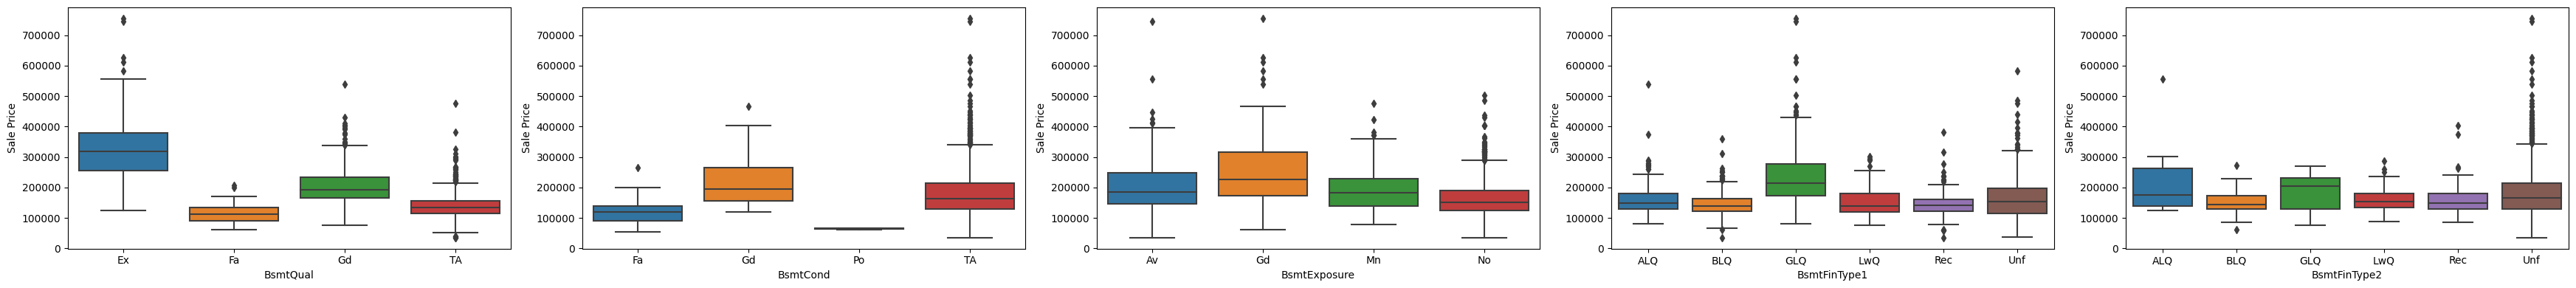

In [101]:
BVA_boxplot(df,cat_bsmt_var)

In [102]:
calculate_eta(df,cat_bsmt_var,'SalePrice')

,Variable,Eta
0,BsmtQual,0.678460
1,BsmtFinType1,0.441780
2,BsmtExposure,0.369163
3,BsmtCond,0.166229
4,BsmtFinType2,0.090287


-The 'BsmtQual' and 'BsmtFinType1' features have a strong ETA scores and thier boxplots are not much wide and don't overlap with each other as well 

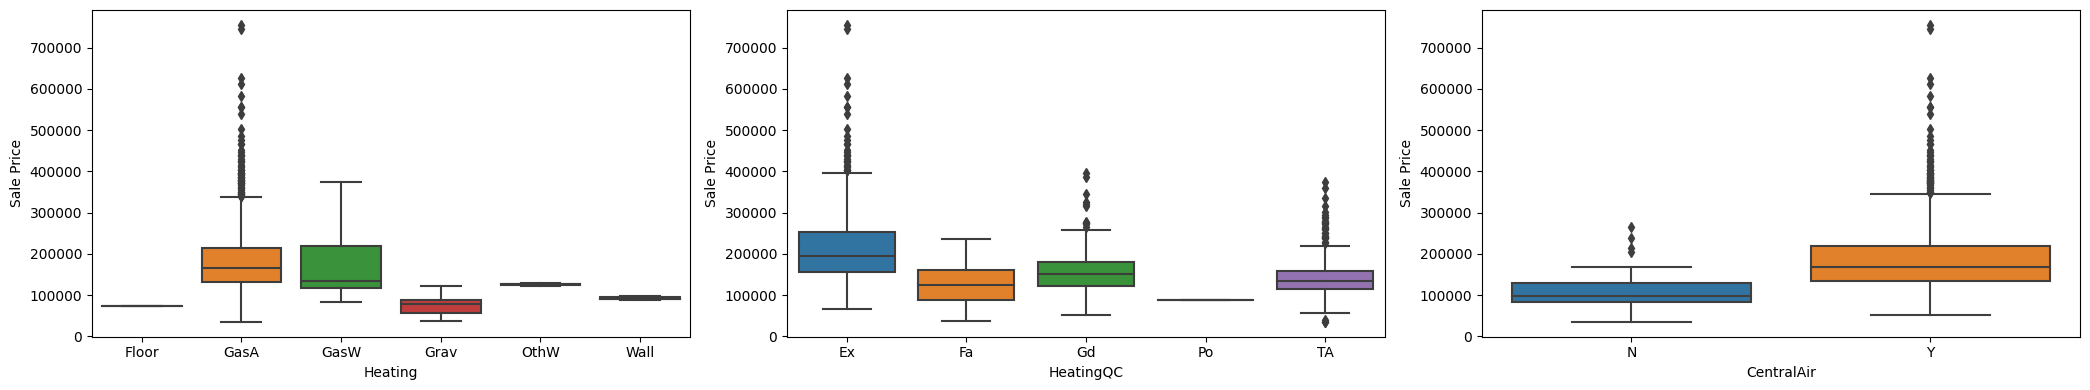

In [103]:
BVA_boxplot(df,cat_heat_air_var)

In [104]:
calculate_eta(df,cat_heat_air_var,'SalePrice')

,Variable,Eta
0,HeatingQC,0.442154
1,CentralAir,0.251328
2,Heating,0.120155


-The HeatingQC feature have a decent ETA score 

-The HeatingQC feature, which represents the quality of the heating system, can potentially affect the SalePrice of a property. The heating system is an essential component of a home, and its quality and functionality can impact the overall comfort and livability of the property.

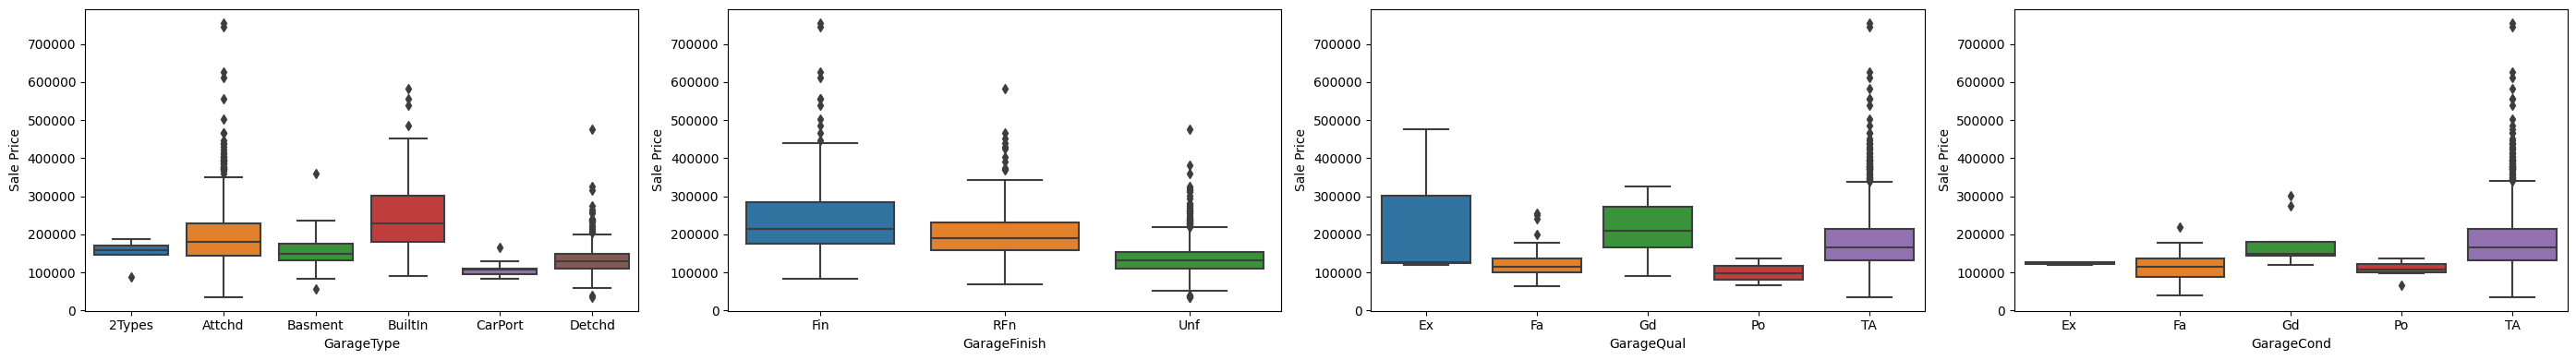

In [105]:
BVA_boxplot(df,cat_garage_var)

In [106]:
calculate_eta(df,cat_garage_var,'SalePrice')

,Variable,Eta
0,GarageFinish,0.542375
1,GarageType,0.411596
2,GarageQual,0.150741
3,GarageCond,0.148509


-The 'GarageFinish' and 'GarageType' features have their boxplots well seperated and have a decent ETA scores

-A finished garage (GarageFinish = 'Fin') with features such as insulation, drywall, and flooring may be perceived as more desirable and can potentially increase the SalePrice. On the other hand, an unfinished garage (GarageFinish = 'Unf') may be viewed as a work in progress or lacking in certain features, potentially impacting the perceived value and SalePrice.

-The GarageType feature represents the type of garage, such as attached, detached, or built-in. The type of garage can have an impact on convenience, accessibility, and security, which can influence the perceived value of a property.

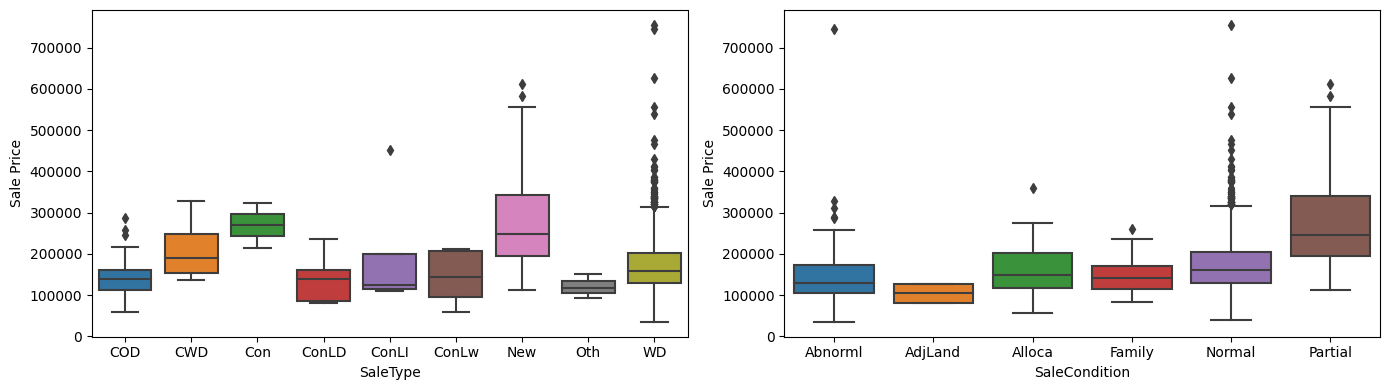

In [107]:
BVA_boxplot(df,cat_sale_var)

In [108]:
calculate_eta(df,cat_sale_var,'SalePrice')

,Variable,Eta
0,SaleType,0.370523
1,SaleCondition,0.368100


-The 'SaleType' and 'SaleCondition' features have a few wide boxplots and they overlap with each other a lot

-Thier ETA scores are not enough to be interpretd as strongly associated with the target variable

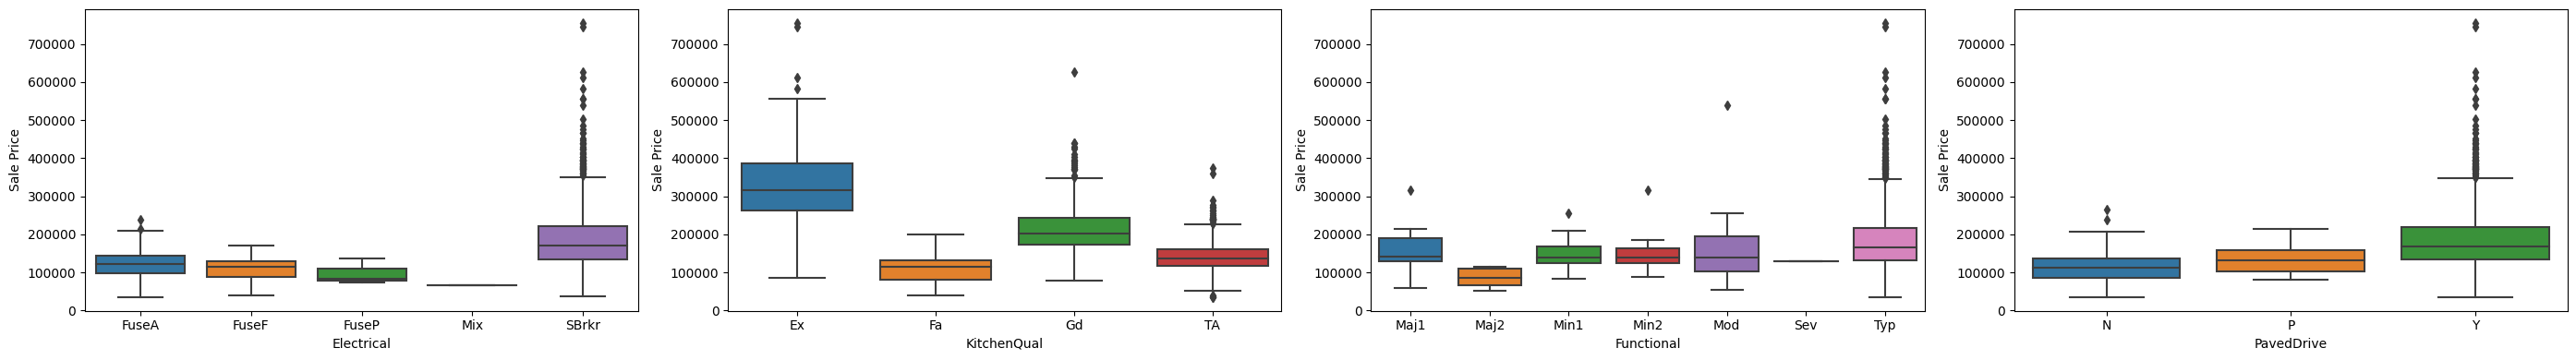

In [109]:
BVA_boxplot(df,other_cat_var)

In [110]:
calculate_eta(df,other_cat_var,'SalePrice')

,Variable,Eta
0,KitchenQual,0.675721
1,Electrical,0.244278
2,PavedDrive,0.233537
3,Functional,0.128376


-Out of all the variables in the group the 'KitchenQual' is the only feature with a well sepearted and not wide boxplots

-The ETA score of KitchenQual is quite good as well

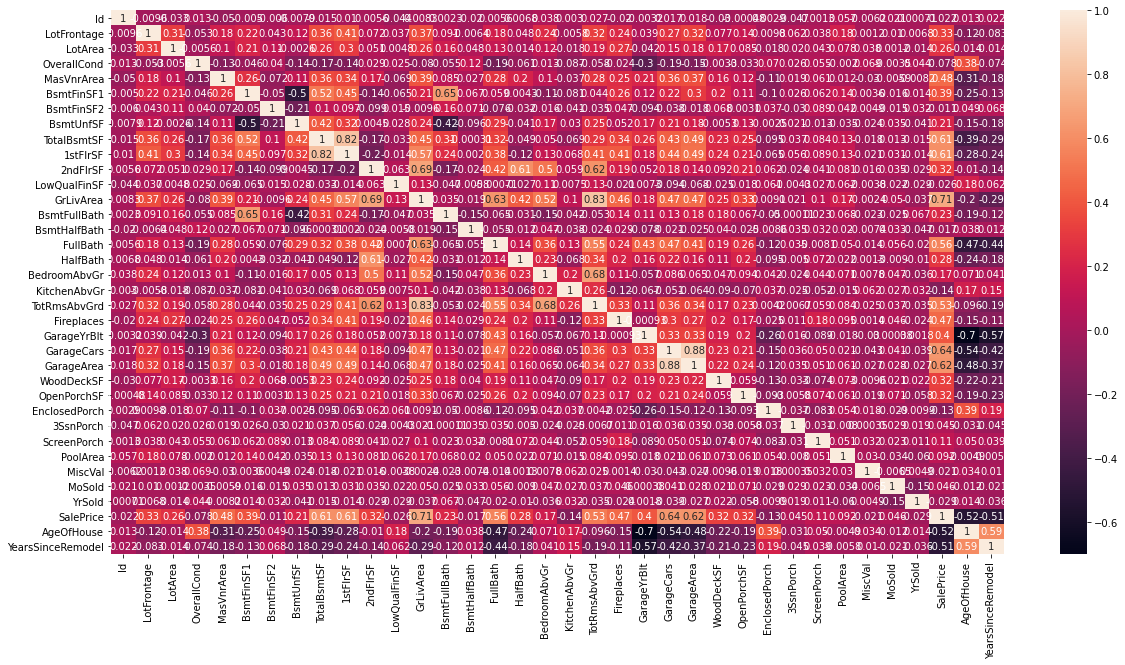

In [111]:
plt.figure(figsize=(20,10))
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

In [112]:
def correlated (dataset,thresold):
  corr_column=set()    # all the highly corelated column
  for i in range(len(correlation.columns)):
      for j in range(i):
        if abs(correlation.iloc[i,j])>=thresold:  # we want absolute value
          column_name=correlation.columns[i]      # getting the name of columns
          corr_column.add(column_name)            # add he name column in empty set
  return corr_column        
          

In [113]:
# Calling the function with threshold value 0.80
highly_correlated_features=correlated(df,0.80)
print('total highly correlated features:',len(set(highly_correlated_features)))

total highly correlated features: 3


In [114]:
highly_correlated_features

{'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'}

The highly correlated features should be removed before model building process as highly correlated features can affect the the model building process